In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd

df = pd.read_csv('Datasets/all_data_clean.csv')
df

hash_name        date    price  \
0               'Blueberries' Buckshot | NSWC SEAL  2020-12-03    2.501   
1               'Blueberries' Buckshot | NSWC SEAL  2020-12-04    1.207   
2               'Blueberries' Buckshot | NSWC SEAL  2020-12-05    1.185   
3               'Blueberries' Buckshot | NSWC SEAL  2020-12-06    1.258   
4               'Blueberries' Buckshot | NSWC SEAL  2020-12-07    1.334   
...                                            ...         ...      ...   
25257188  ★ Ursus Knife | Urban Masked (Well-Worn)  2024-03-11  125.990   
25257189  ★ Ursus Knife | Urban Masked (Well-Worn)  2024-03-14  118.950   
25257190  ★ Ursus Knife | Urban Masked (Well-Worn)  2024-03-15  136.634   
25257191  ★ Ursus Knife | Urban Masked (Well-Worn)  2024-03-16  118.137   
25257192  ★ Ursus Knife | Urban Masked (Well-Worn)  2024-03-18  118.000   

          quantity  
0               50  
1             1038  
2              803  
3              541  
4              430  
...            ...  
25257188         1  
25257189         1  
25257190         2  
25257191         1  
25257192         1  

[25257193 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25257193 entries, 0 to 25257192
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   hash_name  object 
 1   date       object 
 2   price      float64
 3   quantity   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 770.8+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
grouped = df.groupby('hash_name')

# Create a dictionary to store DataFrames for each hash_name with date as index
dfs = {}
names = []

# Iterate over each group and store it in the dictionary with date as index
for idx, (name, group_df) in enumerate(grouped):
    if idx > 50:
        break
    # Convert 'date' column to datetime
    group_df['date'] = pd.to_datetime(group_df['date'])
    
    # Set 'date' column as index
    #group_df.set_index('date', inplace=True)
    names.append(name)
    # Store the DataFrame in the dictionary
    dfs[name] = group_df

In [6]:
names

["'Blueberries' Buckshot | NSWC SEAL",
 "'Medium Rare' Crasswater | Guerrilla Warfare",
 "'The Doctor' Romanov | Sabre",
 "'Two Times' McCoy | TACP Cavalry",
 "'Two Times' McCoy | USAF TACP",
 '10 Year Birthday Sticker Capsule',
 '1st Lieutenant Farlow | SWAT',
 '2020 RMR Challengers',
 '2020 RMR Contenders',
 '2020 RMR Legends',
 '2021 Community Sticker Capsule',
 '3rd Commando Company | KSK',
 'AK-47 | Aquamarine Revenge (Battle-Scarred)',
 'AK-47 | Aquamarine Revenge (Factory New)',
 'AK-47 | Aquamarine Revenge (Field-Tested)',
 'AK-47 | Aquamarine Revenge (Minimal Wear)',
 'AK-47 | Aquamarine Revenge (Well-Worn)',
 'AK-47 | Asiimov (Battle-Scarred)',
 'AK-47 | Asiimov (Factory New)',
 'AK-47 | Asiimov (Field-Tested)',
 'AK-47 | Asiimov (Minimal Wear)',
 'AK-47 | Asiimov (Well-Worn)',
 'AK-47 | Baroque Purple (Battle-Scarred)',
 'AK-47 | Baroque Purple (Factory New)',
 'AK-47 | Baroque Purple (Field-Tested)',
 'AK-47 | Baroque Purple (Minimal Wear)',
 'AK-47 | Baroque Purple (Well-W

In [7]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [8]:
train_test_dfs = {}

# Ratio for train-test split
train_size_ratio = 0.8  # 80% for train set

# Iterate over each DataFrame in the dictionary
for name, df in dfs.items():
    # Calculate the index to split the data
    split_index = int(len(df) * train_size_ratio)
    
    # Split the DataFrame into train and test sets
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    
    # Store the train and test sets in the dictionary
    train_test_dfs[name] = {'train_df': train_df, 'test_df': test_df}

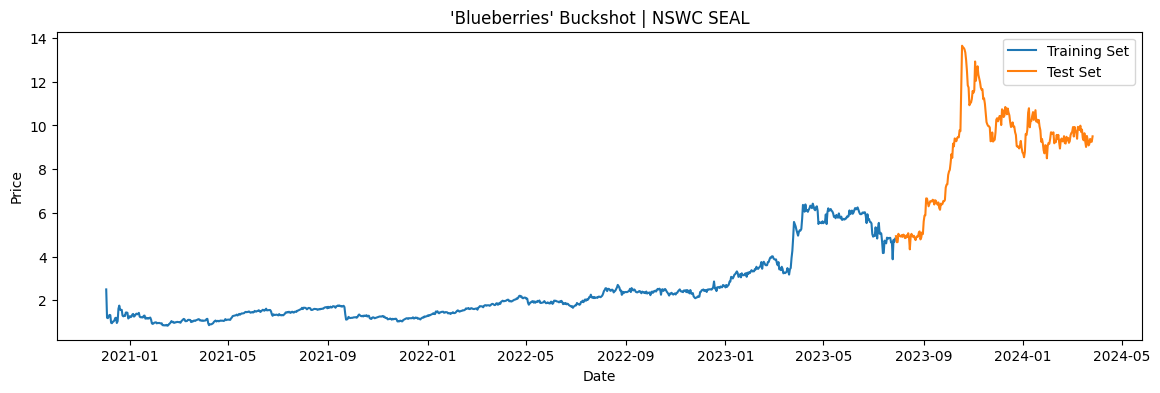

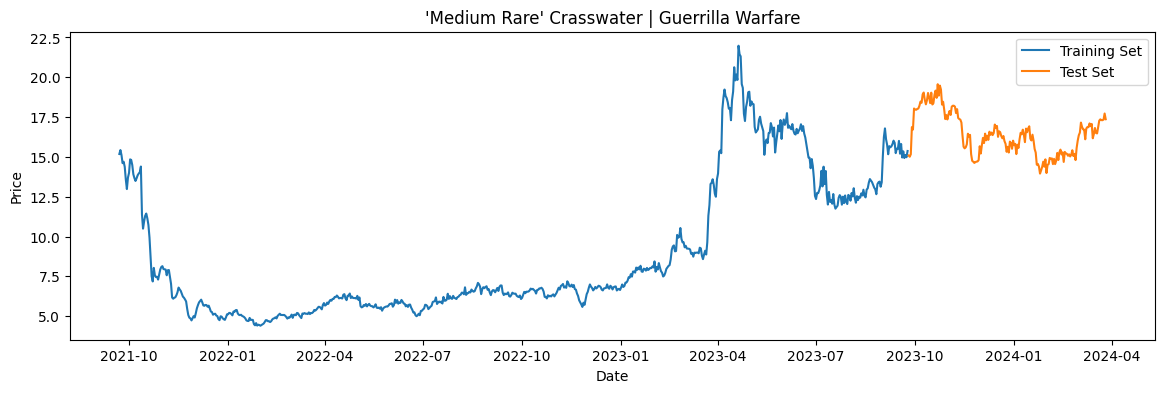

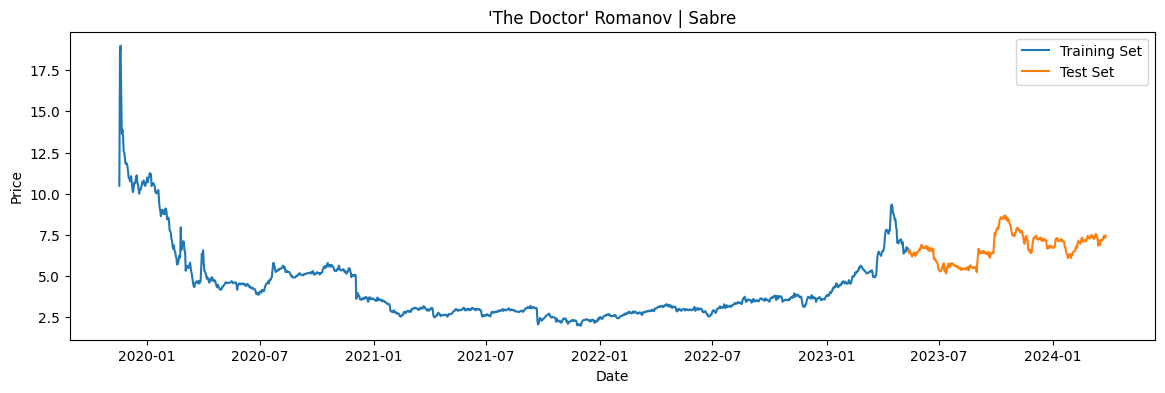

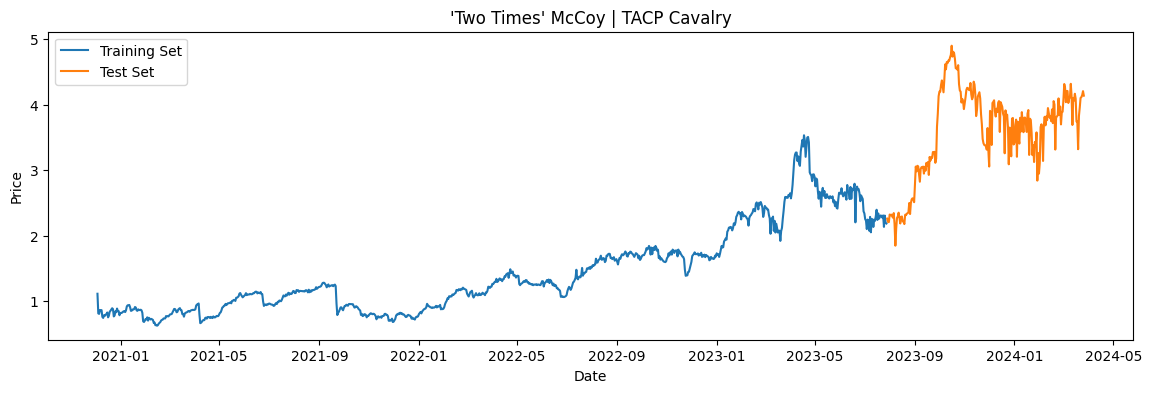

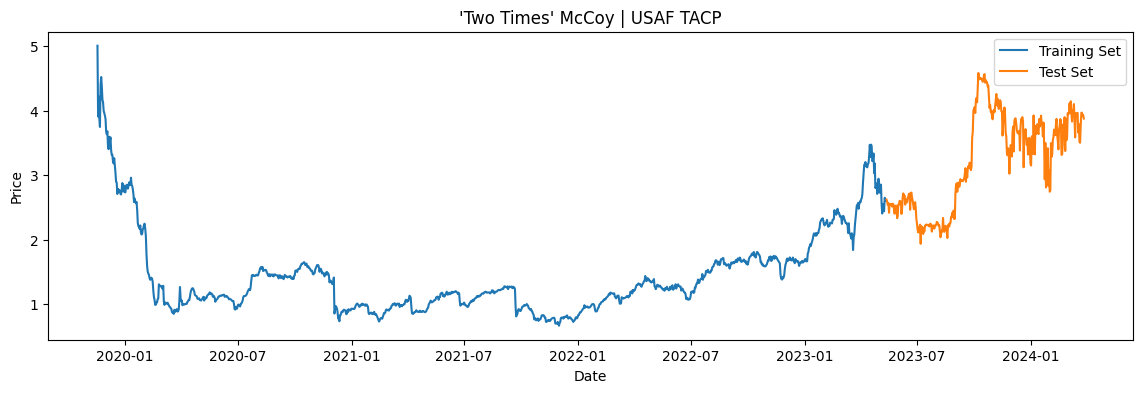

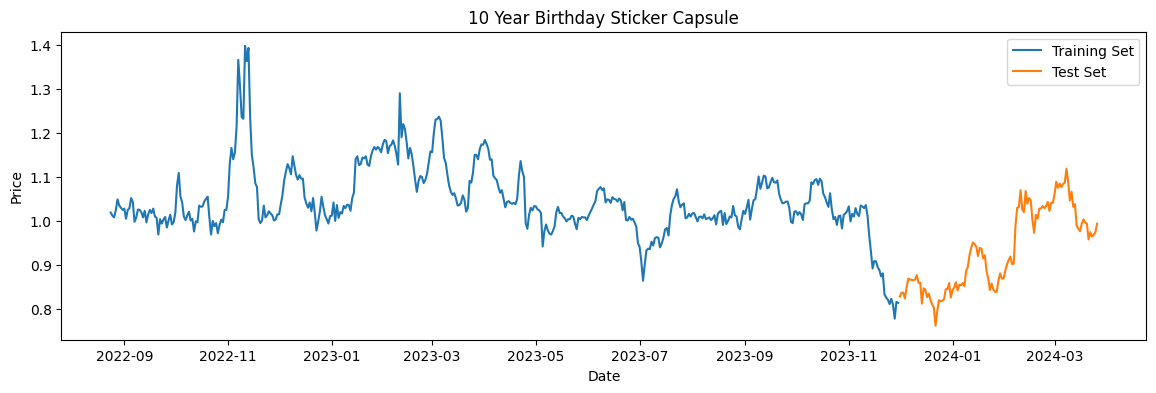

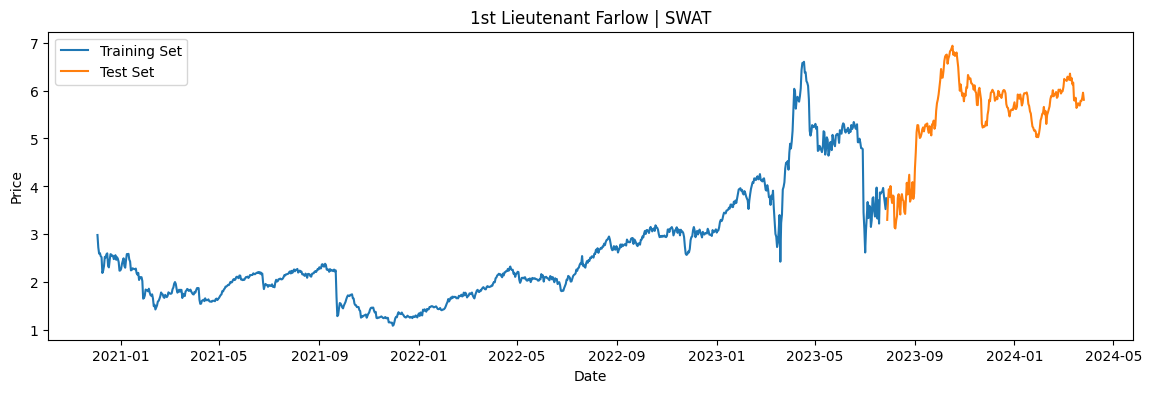

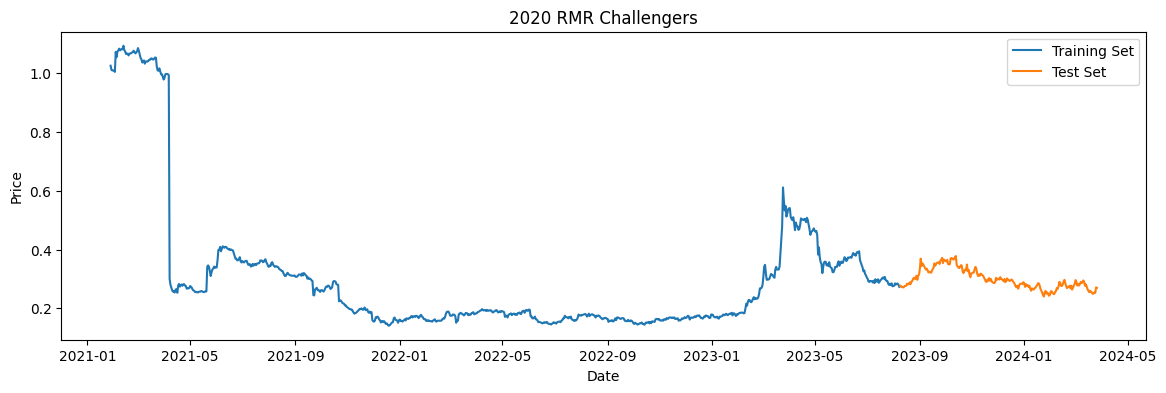

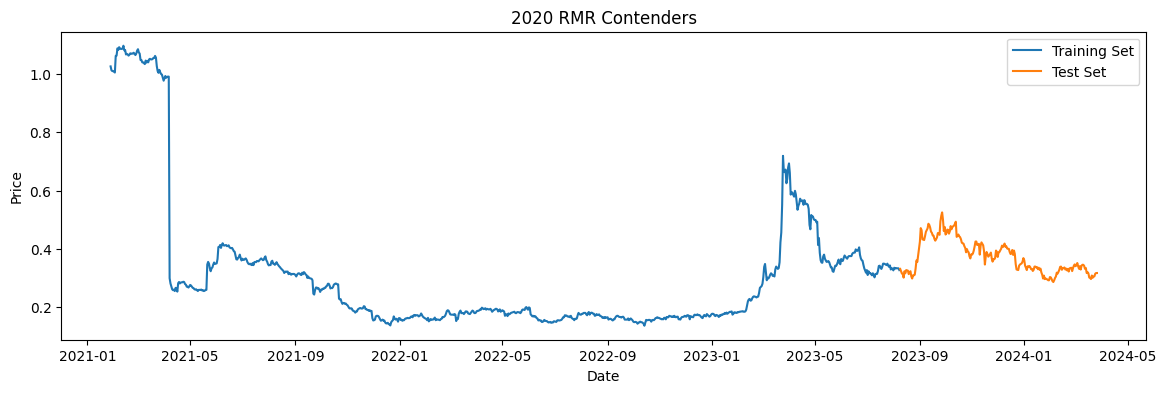

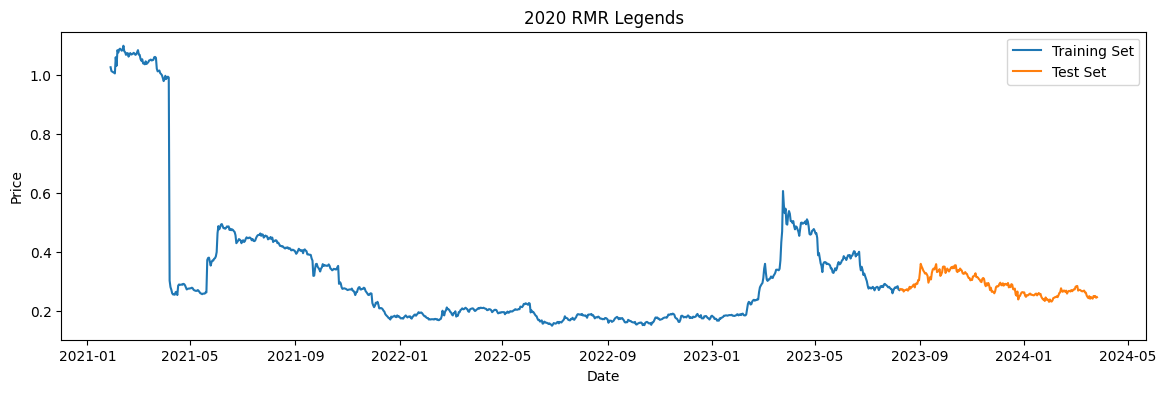

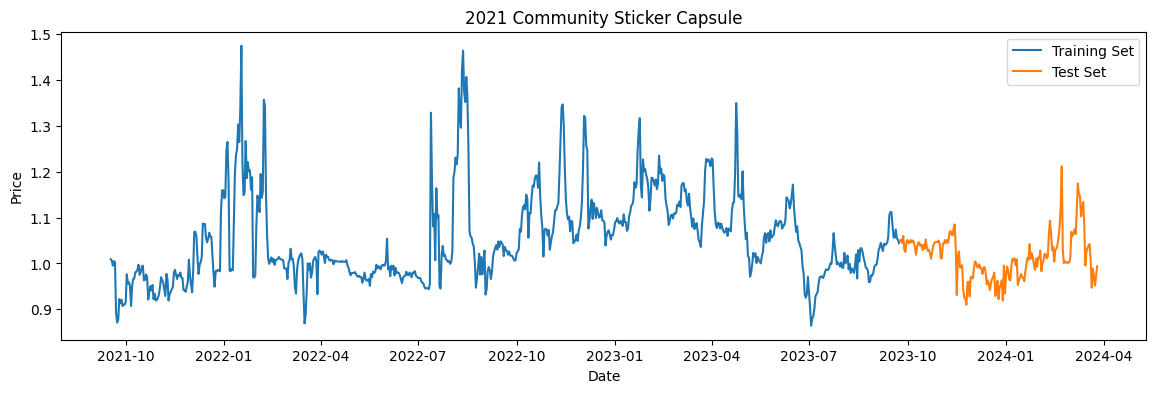

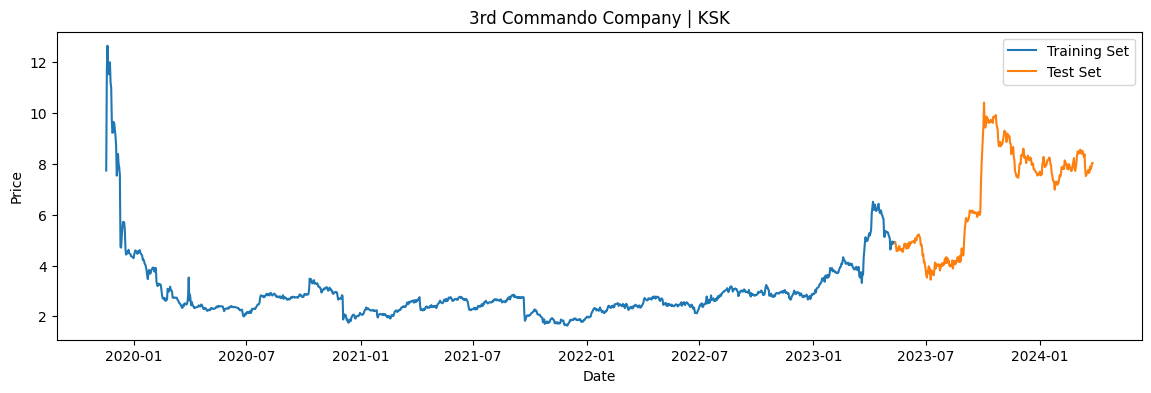

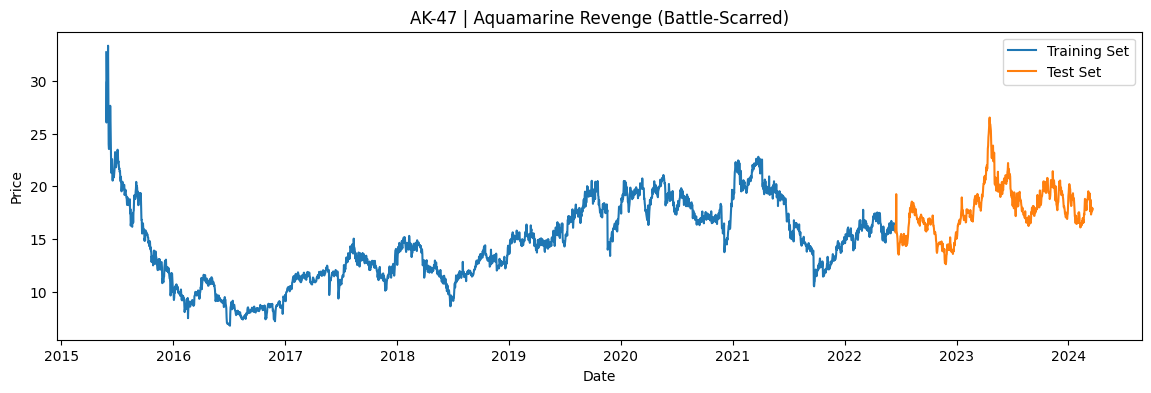

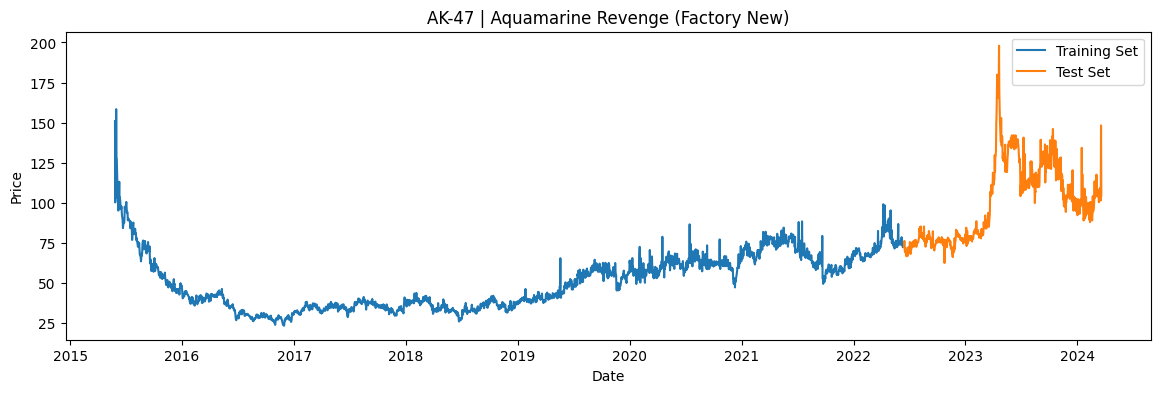

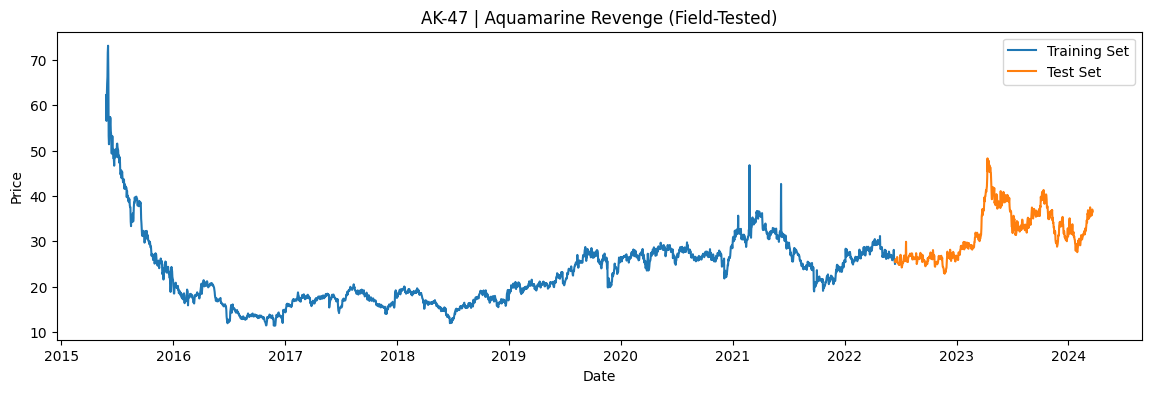

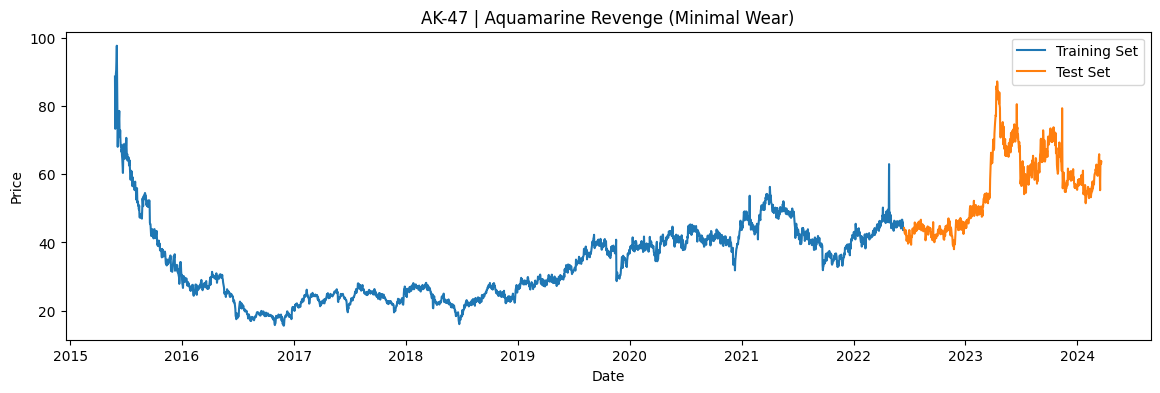

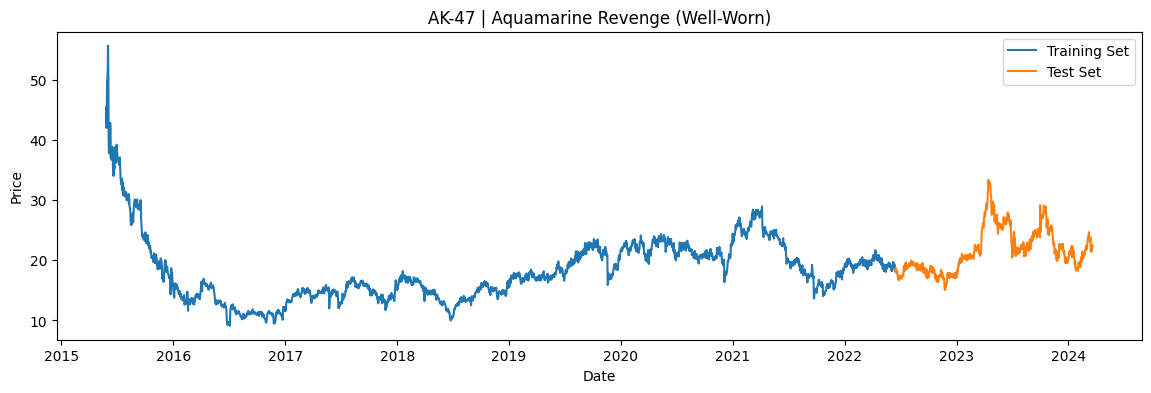

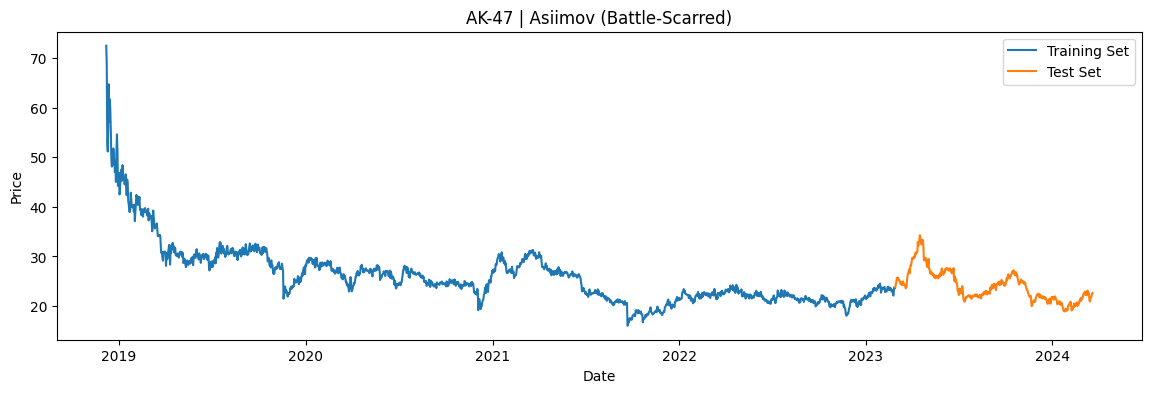

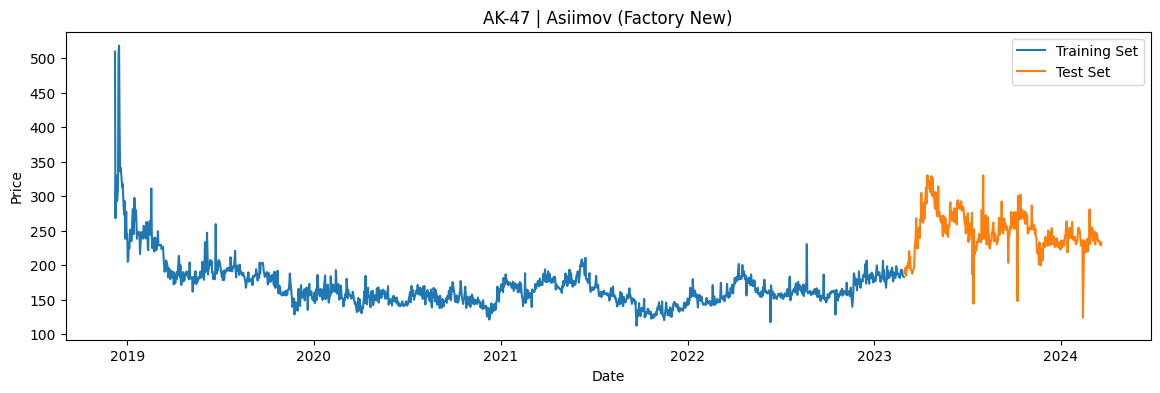

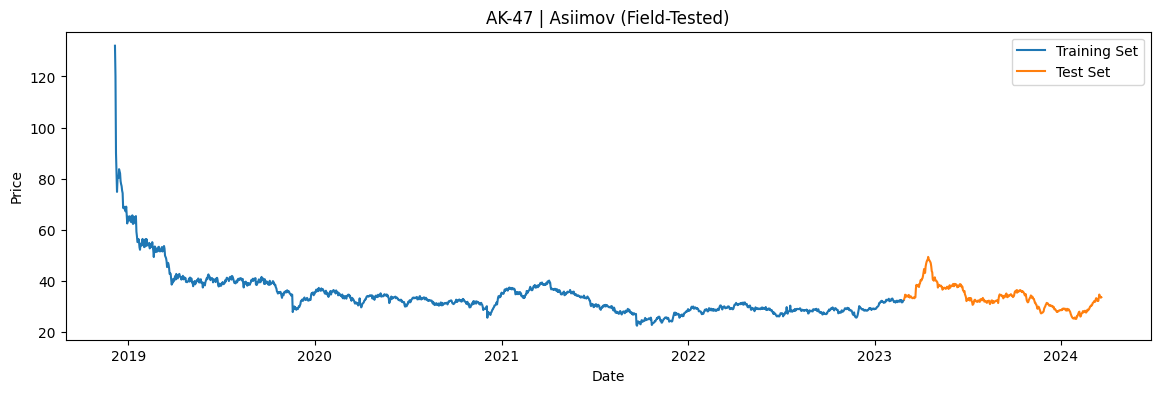

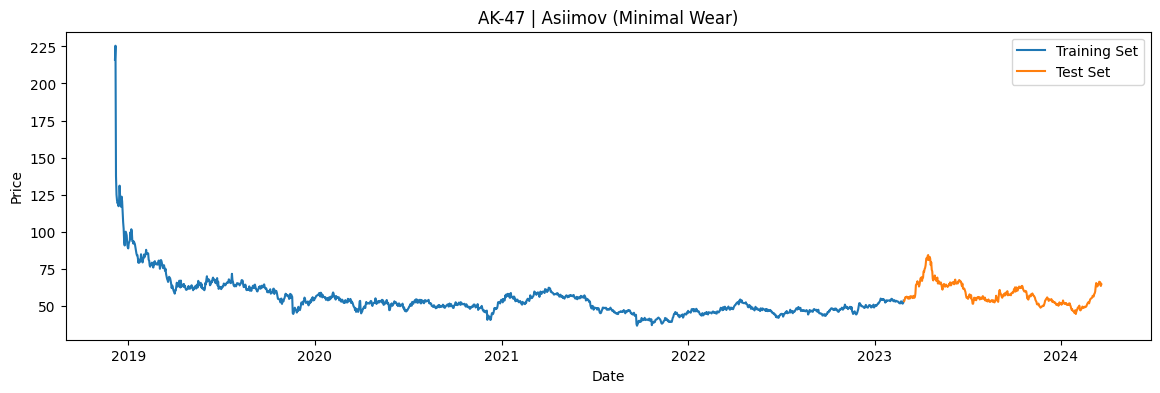

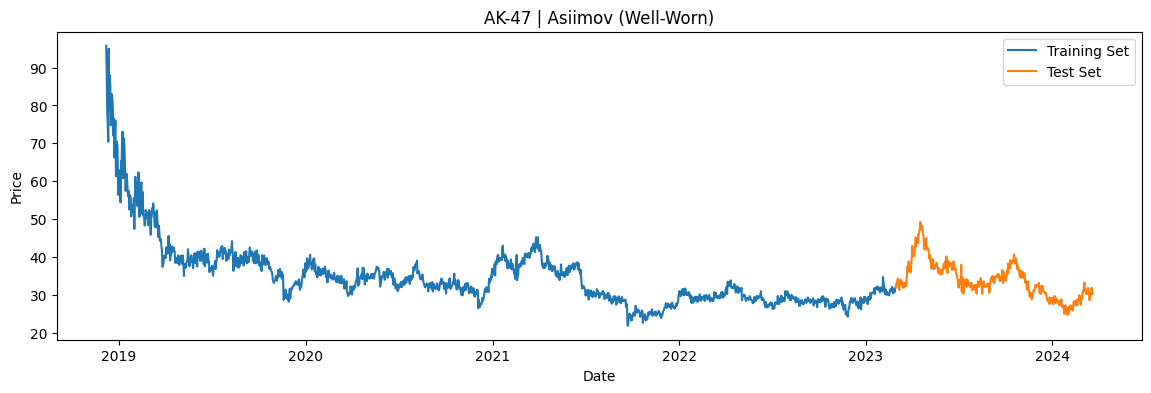

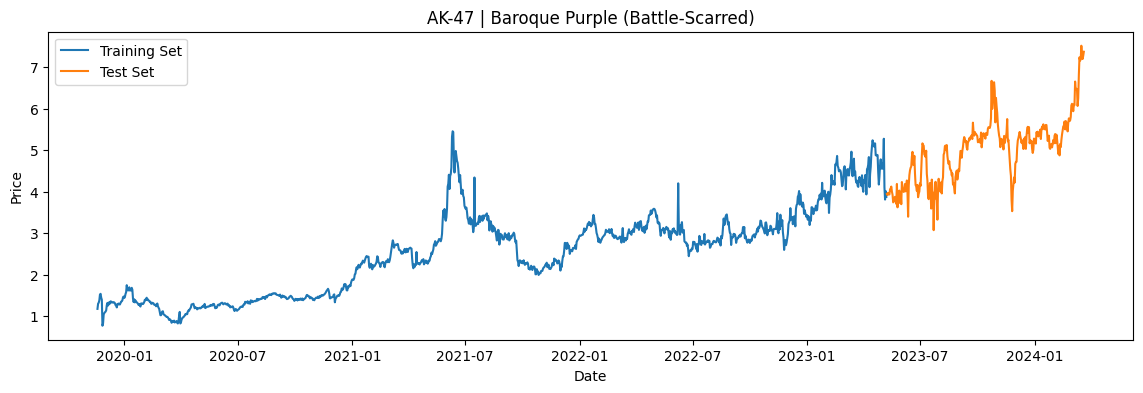

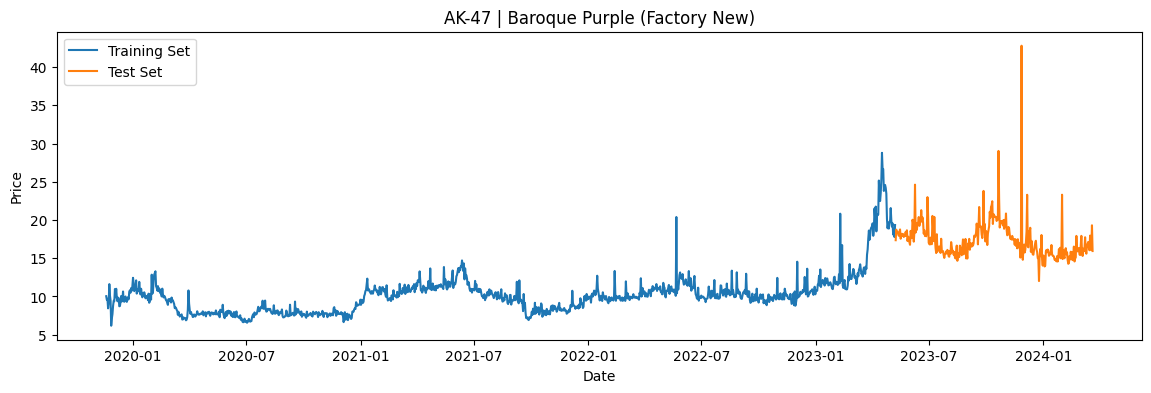

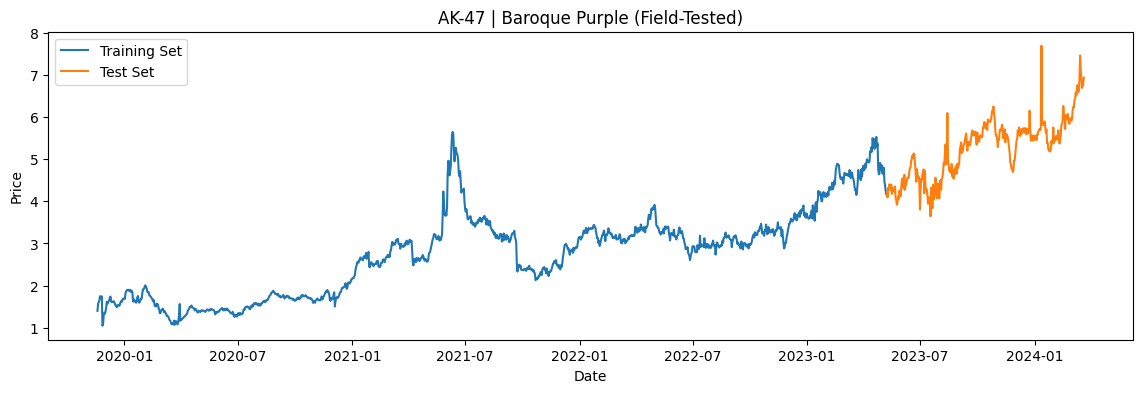

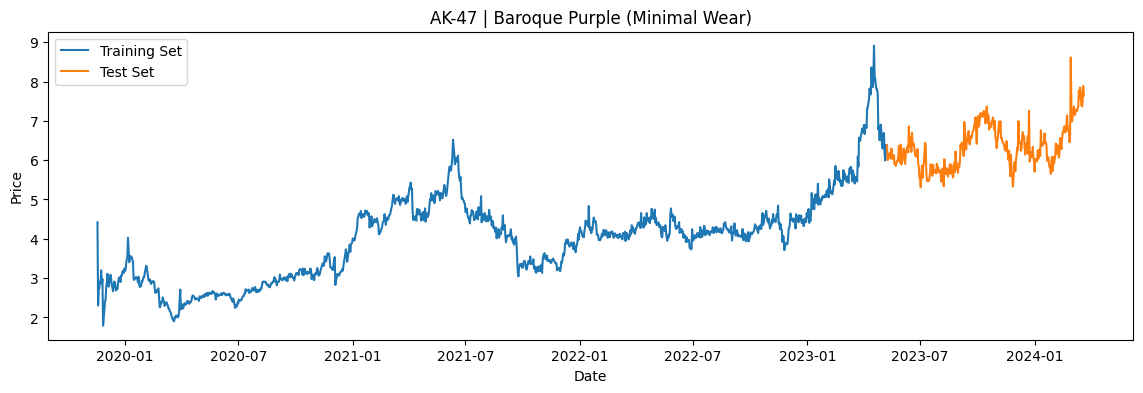

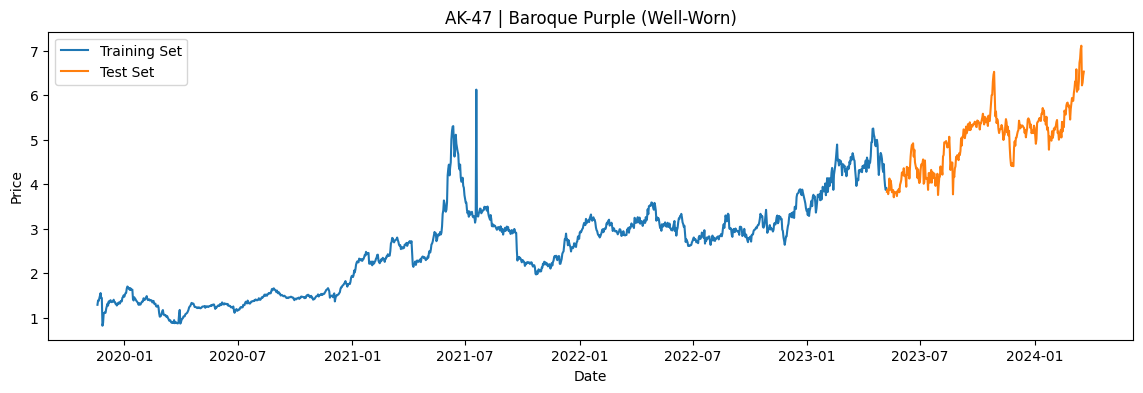

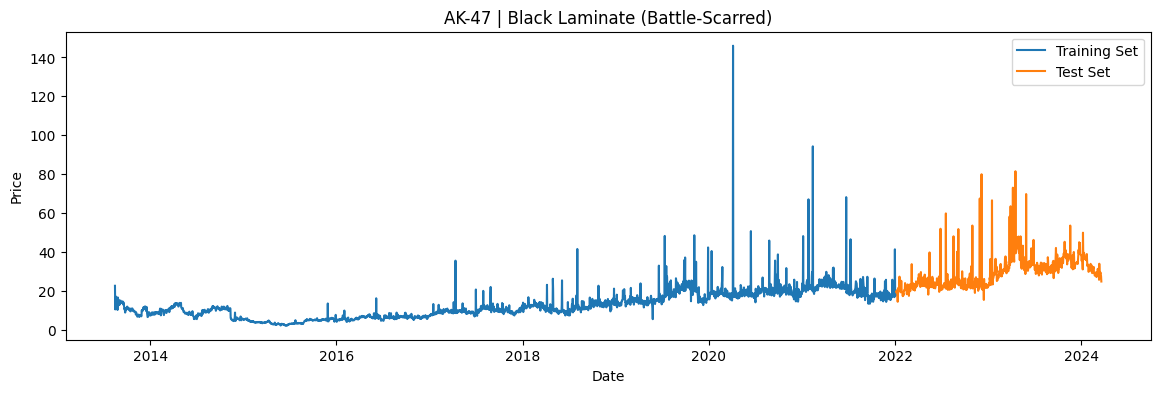

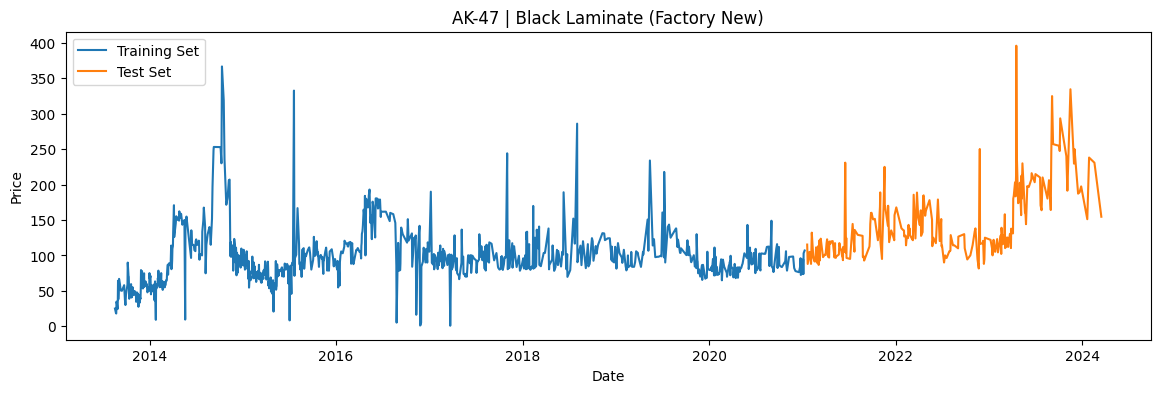

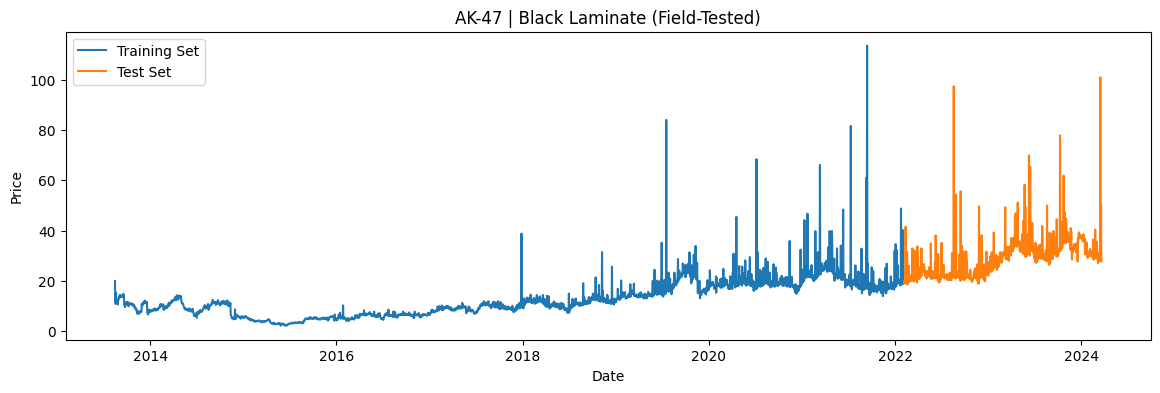

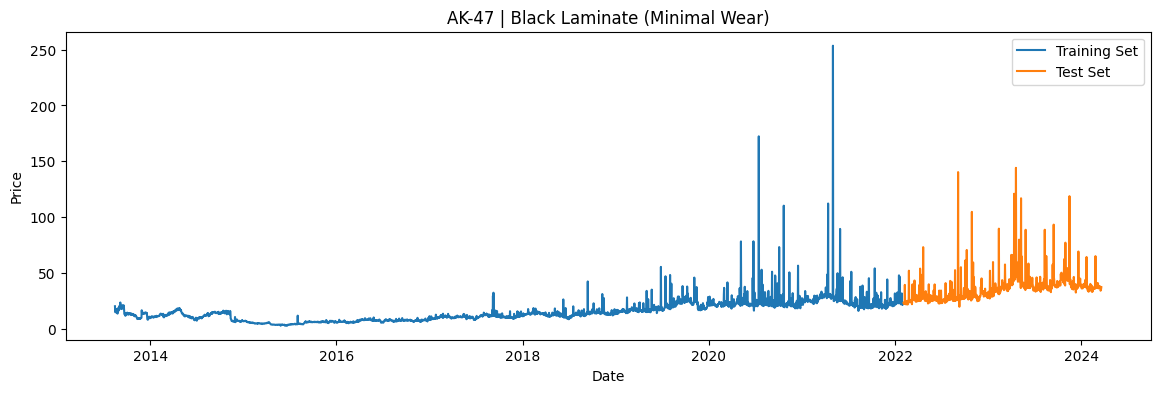

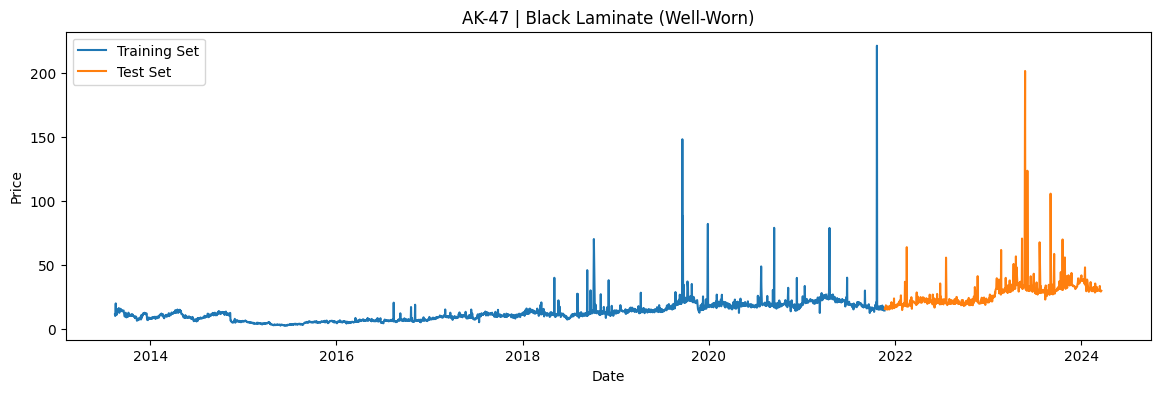

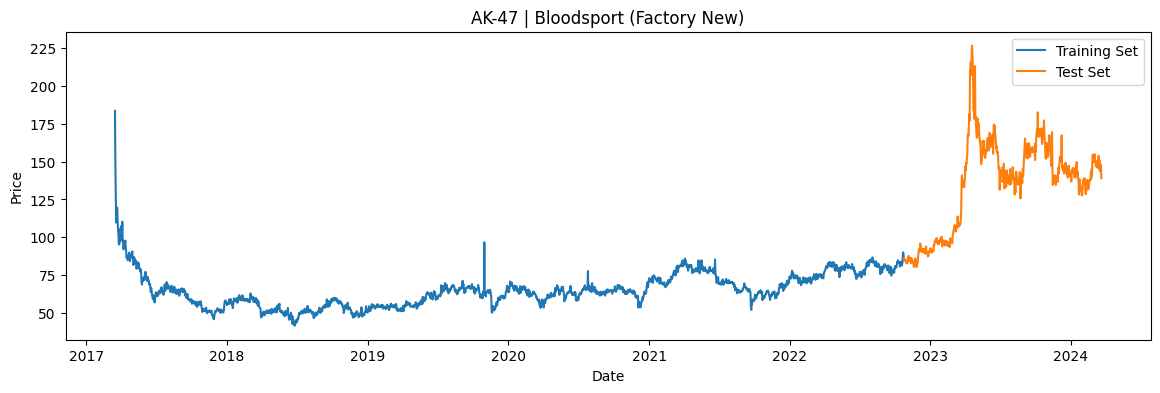

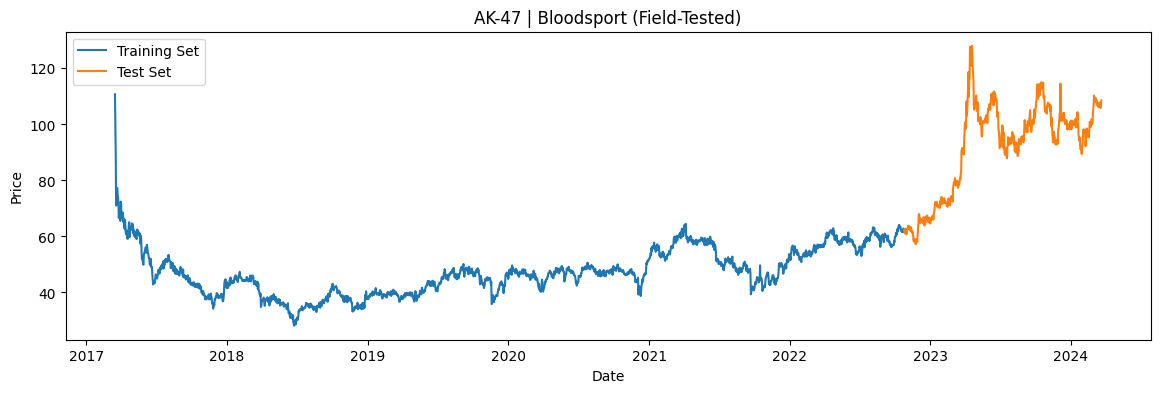

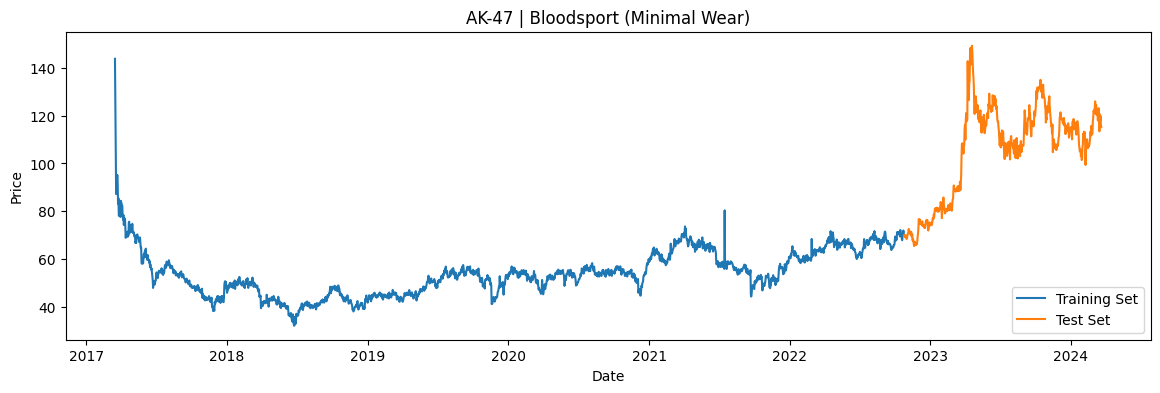

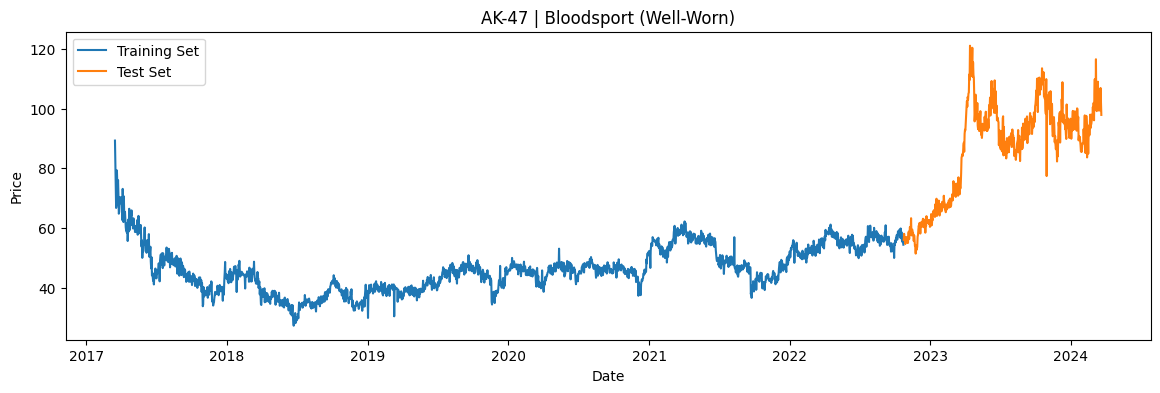

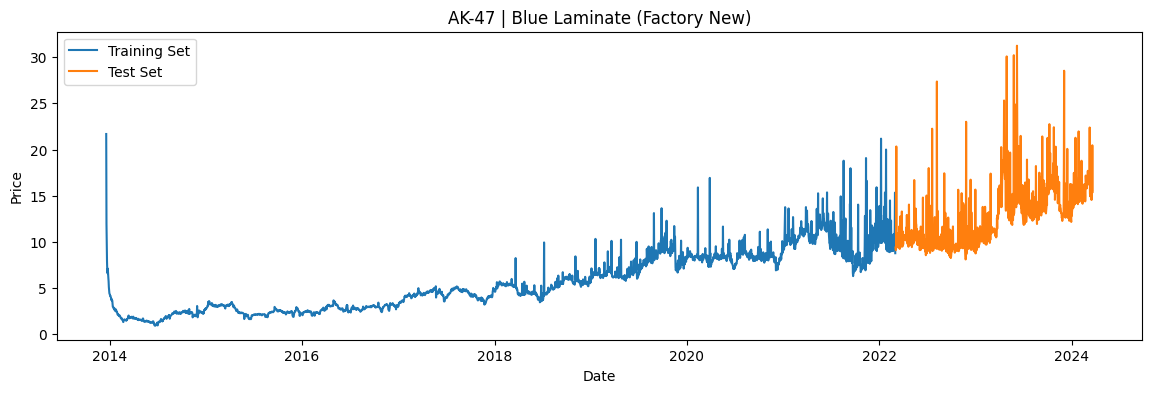

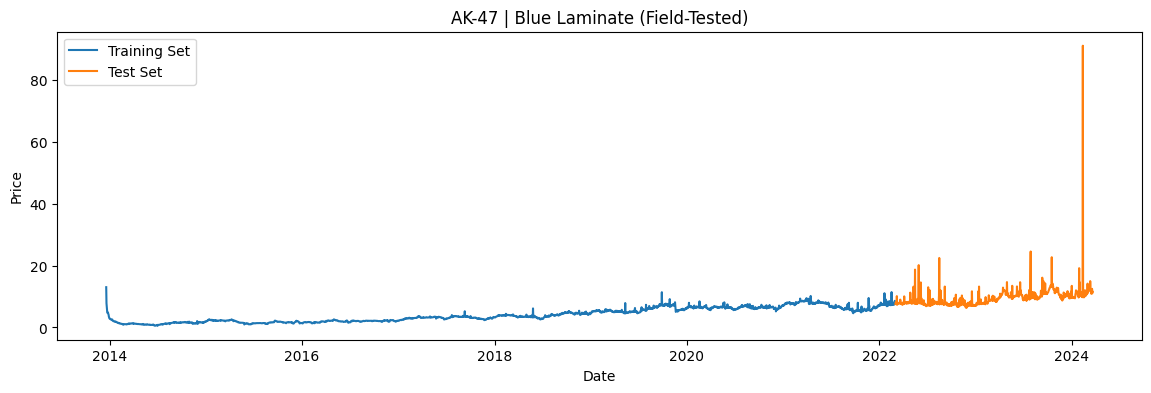

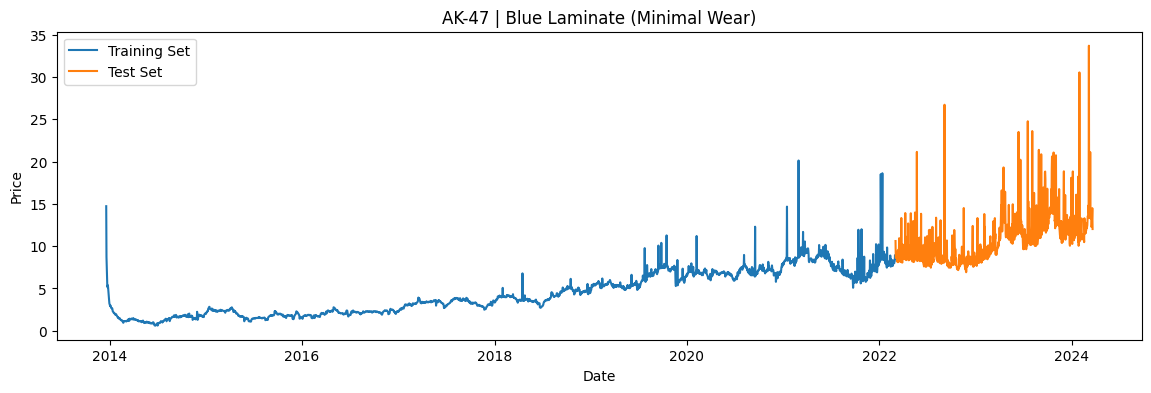

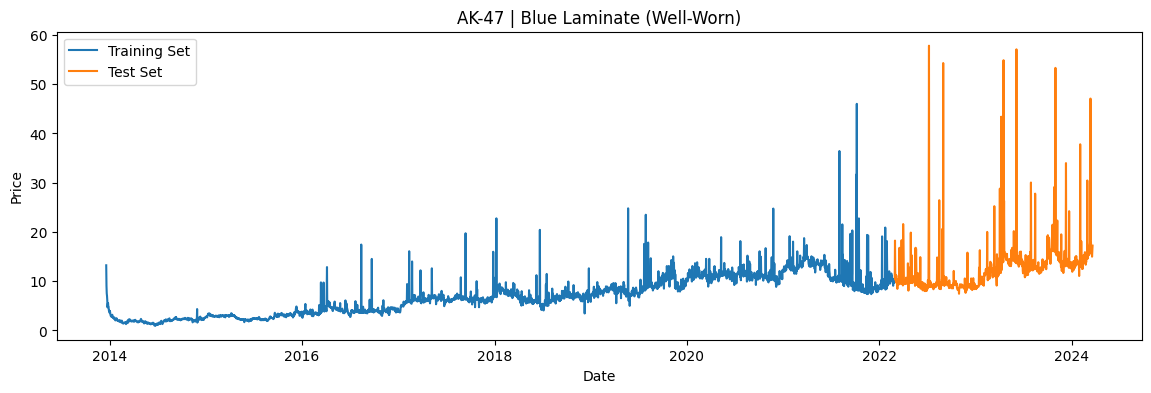

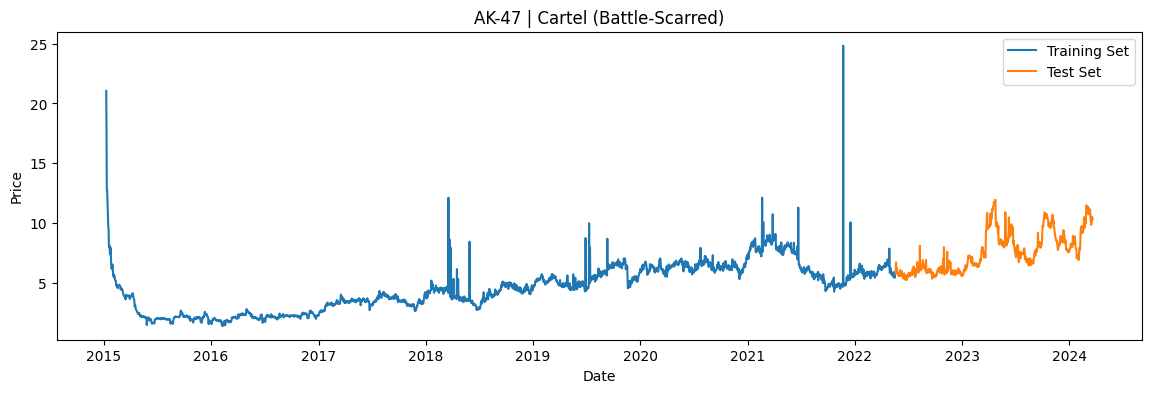

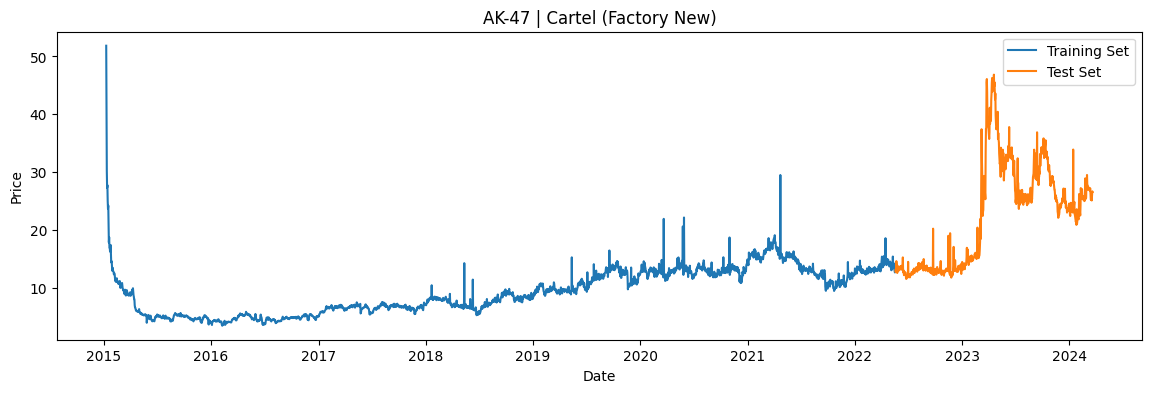

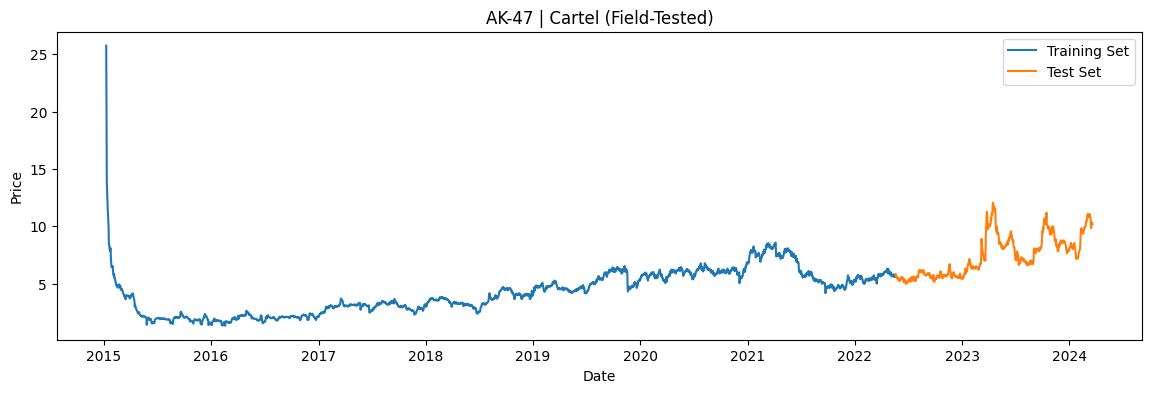

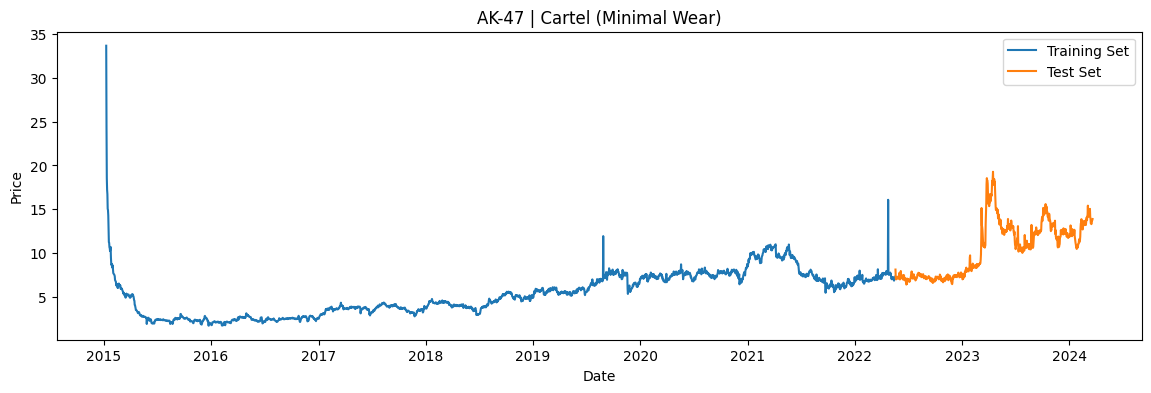

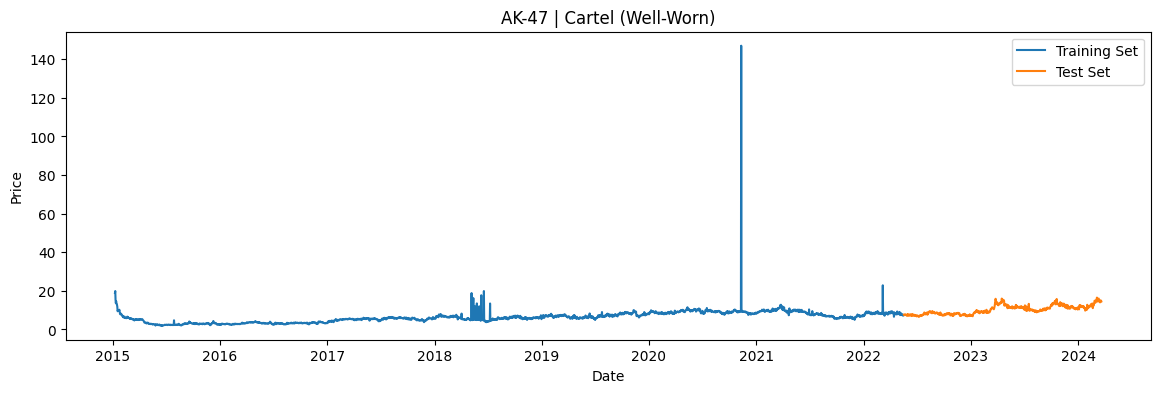

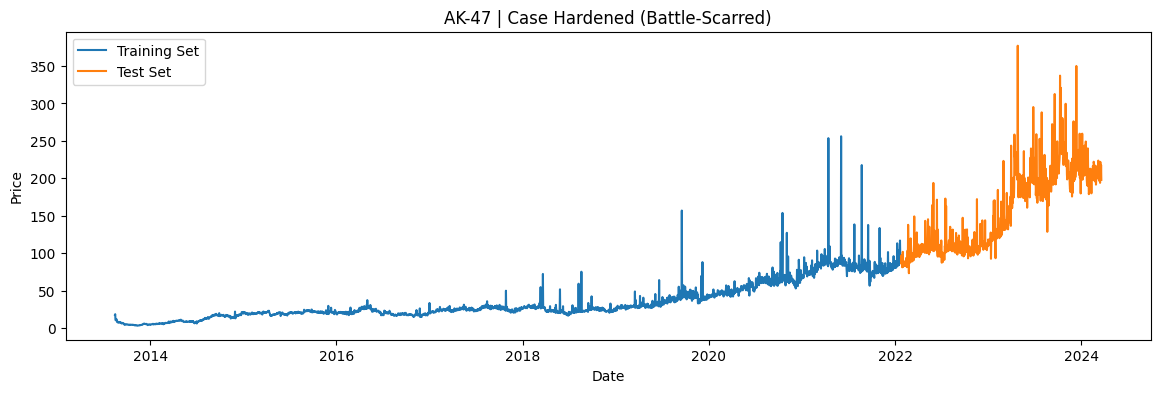

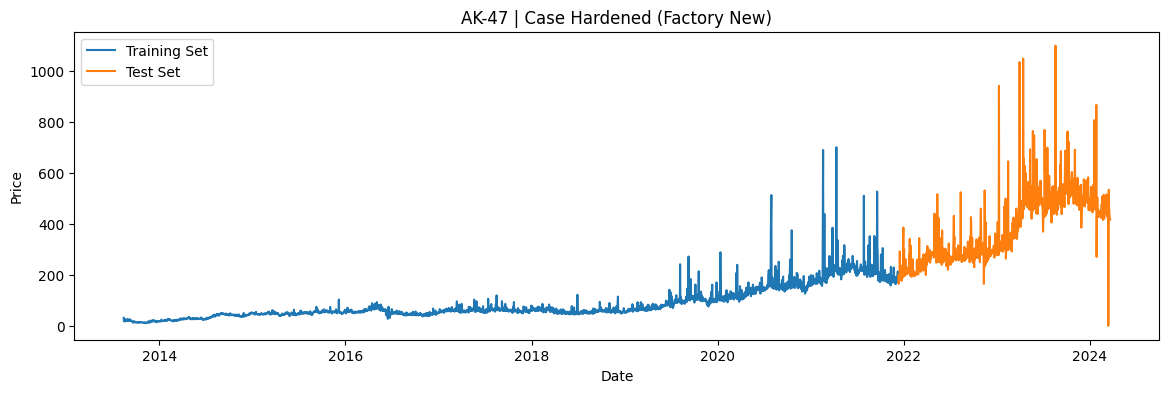

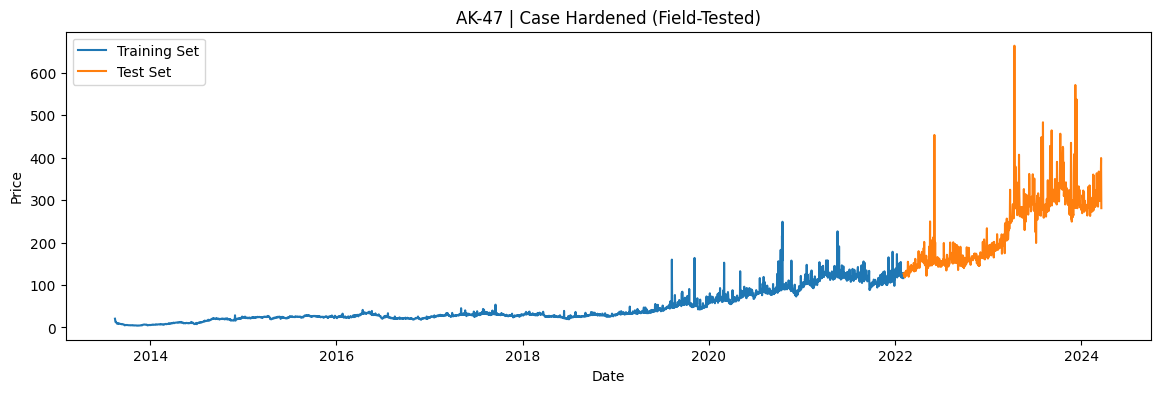

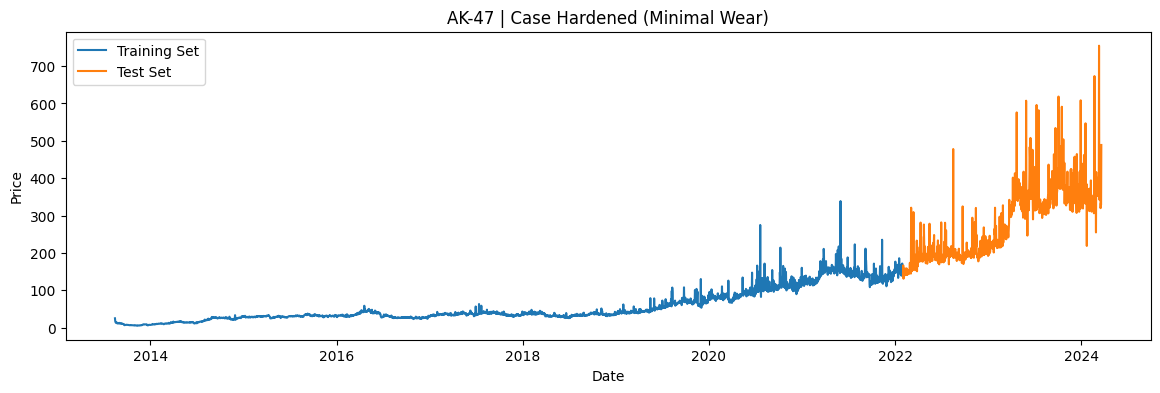

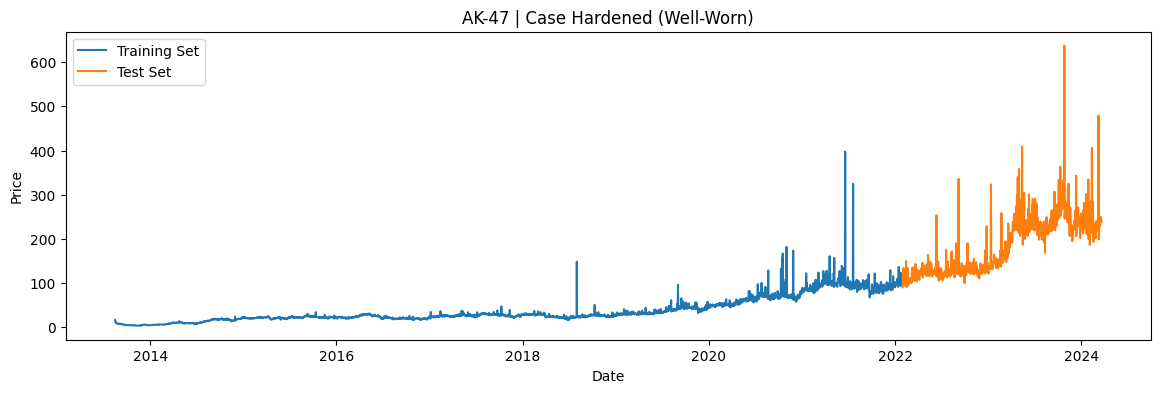

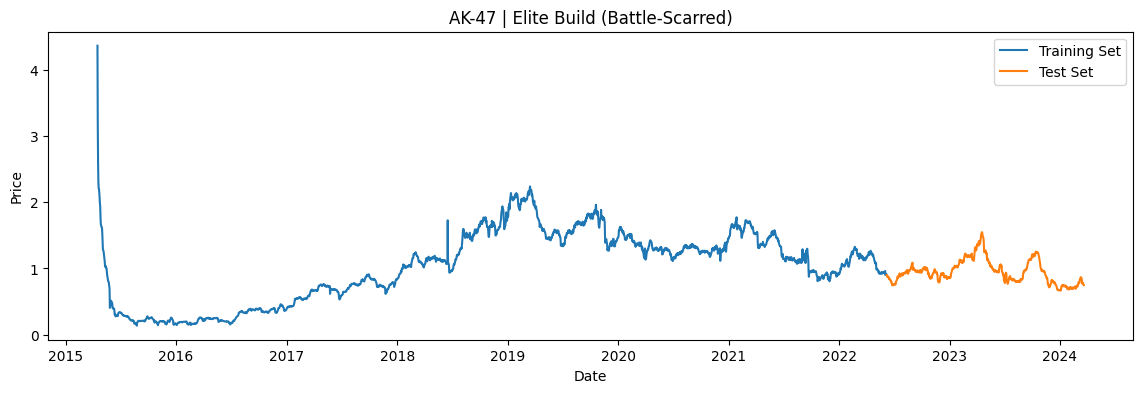

In [9]:
import matplotlib.pyplot as plt

for name, data in train_test_dfs.items():
    train_df = data['train_df']
    test_df = data['test_df']
    
    # Plot
    plt.figure(figsize=(14,4))
    plt.plot(train_df['date'],train_df['price'], label="Training Set")
    plt.plot(test_df['date'],test_df['price'], label="Test Set")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend()
    plt.title(name)
    plt.show()

In [10]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for name, data in train_test_dfs.items():
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data['train_df']['price'])
    a1 = np.array(data['test_df']['price'])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[name] = sc.fit_transform(a0)
    transform_test[name] = sc.fit_transform(a1)
    scaler[name] = sc
    
del a0
del a1

In [11]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

'Blueberries' Buckshot | NSWC SEAL (968, 1)
'Medium Rare' Crasswater | Guerrilla Warfare (733, 1)
'The Doctor' Romanov | Sabre (1272, 1)
'Two Times' McCoy | TACP Cavalry (968, 1)
'Two Times' McCoy | USAF TACP (1272, 1)
10 Year Birthday Sticker Capsule (464, 1)
1st Lieutenant Farlow | SWAT (968, 1)
2020 RMR Challengers (923, 1)
2020 RMR Contenders (923, 1)
2020 RMR Legends (923, 1)
2021 Community Sticker Capsule (737, 1)
3rd Commando Company | KSK (1272, 1)
AK-47 | Aquamarine Revenge (Battle-Scarred) (2576, 1)
AK-47 | Aquamarine Revenge (Factory New) (2576, 1)
AK-47 | Aquamarine Revenge (Field-Tested) (2576, 1)
AK-47 | Aquamarine Revenge (Minimal Wear) (2576, 1)
AK-47 | Aquamarine Revenge (Well-Worn) (2576, 1)
AK-47 | Asiimov (Battle-Scarred) (1544, 1)
AK-47 | Asiimov (Factory New) (1478, 1)
AK-47 | Asiimov (Field-Tested) (1545, 1)
AK-47 | Asiimov (Minimal Wear) (1545, 1)
AK-47 | Asiimov (Well-Worn) (1544, 1)
AK-47 | Baroque Purple (Battle-Scarred) (1267, 1)
AK-47 | Baroque Purple (Fact

In [12]:
trainset = {}
testset = {}
for j in names:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,transform_train[j].shape[0]):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, transform_test[j].shape[0]):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [13]:
testset['10 Year Birthday Sticker Capsule']['X']

array([[[0.18507681],
        [0.21031456],
        [0.21031456],
        ...,
        [0.21592295],
        [0.28883199],
        [0.3336991 ]],

       [[0.21031456],
        [0.21031456],
        [0.17386003],
        ...,
        [0.28883199],
        [0.3336991 ],
        [0.30004877]],

       [[0.21031456],
        [0.17386003],
        [0.24396489],
        ...,
        [0.3336991 ],
        [0.30004877],
        [0.30004877]],

       ...,

       [[0.26920263],
        [0.22994392],
        [0.21592295],
        ...,
        [0.54925628],
        [0.5957744 ],
        [0.56864179]],

       [[0.22994392],
        [0.21592295],
        [0.21592295],
        ...,
        [0.5957744 ],
        [0.56864179],
        [0.57801451]],

       [[0.21592295],
        [0.21592295],
        [0.28883199],
        ...,
        [0.56864179],
        [0.57801451],
        [0.59542388]]])

In [14]:
arr_buff = []
for i in names:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=names)

X_train  y_train  \
'Blueberries' Buckshot | NSWC SEAL             (908, 60, 1)   (908,)   
'Medium Rare' Crasswater | Guerrilla Warfare   (673, 60, 1)   (673,)   
'The Doctor' Romanov | Sabre                  (1212, 60, 1)  (1212,)   
'Two Times' McCoy | TACP Cavalry               (908, 60, 1)   (908,)   
'Two Times' McCoy | USAF TACP                 (1212, 60, 1)  (1212,)   
10 Year Birthday Sticker Capsule               (404, 60, 1)   (404,)   
1st Lieutenant Farlow | SWAT                   (908, 60, 1)   (908,)   
2020 RMR Challengers                           (863, 60, 1)   (863,)   
2020 RMR Contenders                            (863, 60, 1)   (863,)   
2020 RMR Legends                               (863, 60, 1)   (863,)   
2021 Community Sticker Capsule                 (677, 60, 1)   (677,)   
3rd Commando Company | KSK                    (1212, 60, 1)  (1212,)   
AK-47 | Aquamarine Revenge (Battle-Scarred)   (2516, 60, 1)  (2516,)   
AK-47 | Aquamarine Revenge (Factory New)      (2516, 60, 1)  (2516,)   
AK-47 | Aquamarine Revenge (Field-Tested)     (2516, 60, 1)  (2516,)   
AK-47 | Aquamarine Revenge (Minimal Wear)     (2516, 60, 1)  (2516,)   
AK-47 | Aquamarine Revenge (Well-Worn)        (2516, 60, 1)  (2516,)   
AK-47 | Asiimov (Battle-Scarred)              (1484, 60, 1)  (1484,)   
AK-47 | Asiimov (Factory New)                 (1418, 60, 1)  (1418,)   
AK-47 | Asiimov (Field-Tested)                (1485, 60, 1)  (1485,)   
AK-47 | Asiimov (Minimal Wear)                (1485, 60, 1)  (1485,)   
AK-47 | Asiimov (Well-Worn)                   (1484, 60, 1)  (1484,)   
AK-47 | Baroque Purple (Battle-Scarred)       (1207, 60, 1)  (1207,)   
AK-47 | Baroque Purple (Factory New)          (1207, 60, 1)  (1207,)   
AK-47 | Baroque Purple (Field-Tested)         (1207, 60, 1)  (1207,)   
AK-47 | Baroque Purple (Minimal Wear)         (1208, 60, 1)  (1208,)   
AK-47 | Baroque Purple (Well-Worn)            (1207, 60, 1)  (1207,)   
AK-47 | Black Laminate (Battle-Scarred)       (2860, 60, 1)  (2860,)   
AK-47 | Black Laminate (Factory New)           (887, 60, 1)   (887,)   
AK-47 | Black Laminate (Field-Tested)         (3036, 60, 1)  (3036,)   
AK-47 | Black Laminate (Minimal Wear)         (3033, 60, 1)  (3033,)   
AK-47 | Black Laminate (Well-Worn)            (2700, 60, 1)  (2700,)   
AK-47 | Bloodsport (Factory New)              (1989, 60, 1)  (1989,)   
AK-47 | Bloodsport (Field-Tested)             (1989, 60, 1)  (1989,)   
AK-47 | Bloodsport (Minimal Wear)             (1989, 60, 1)  (1989,)   
AK-47 | Bloodsport (Well-Worn)                (1988, 60, 1)  (1988,)   
AK-47 | Blue Laminate (Factory New)           (2936, 60, 1)  (2936,)   
AK-47 | Blue Laminate (Field-Tested)          (2936, 60, 1)  (2936,)   
AK-47 | Blue Laminate (Minimal Wear)          (2936, 60, 1)  (2936,)   
AK-47 | Blue Laminate (Well-Worn)             (2928, 60, 1)  (2928,)   
AK-47 | Cartel (Battle-Scarred)               (2627, 60, 1)  (2627,)   
AK-47 | Cartel (Factory New)                  (2627, 60, 1)  (2627,)   
AK-47 | Cartel (Field-Tested)                 (2627, 60, 1)  (2627,)   
AK-47 | Cartel (Minimal Wear)                 (2627, 60, 1)  (2627,)   
AK-47 | Cartel (Well-Worn)                    (2626, 60, 1)  (2626,)   
AK-47 | Case Hardened (Battle-Scarred)        (3022, 60, 1)  (3022,)   
AK-47 | Case Hardened (Factory New)           (2956, 60, 1)  (2956,)   
AK-47 | Case Hardened (Field-Tested)          (3034, 60, 1)  (3034,)   
AK-47 | Case Hardened (Minimal Wear)          (3031, 60, 1)  (3031,)   
AK-47 | Case Hardened (Well-Worn)             (3030, 60, 1)  (3030,)   
AK-47 | Elite Build (Battle-Scarred)          (2549, 60, 1)  (2549,)   

                                                    X_test  y_test  
'Blueberries' Buckshot | NSWC SEAL            (182, 60, 1)  (182,)  
'Medium Rare' Crasswater | Guerrilla Warfare  (124, 60, 1)  (124,)  
'The Doctor' Romanov | Sabre                  (259, 60, 1)  (259,)  
'Two Times' McCoy | TACP Cavalr

In [15]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in names:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=20, batch_size=60)

Fitting to 'Blueberries' Buckshot | NSWC SEAL
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0679
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0211
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0131
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0094
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0113
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0129
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0094
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0067
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0073
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0085
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0079
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0143
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0115
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0091
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0100
Epoch 16/20
16/

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/var/folders/7b/gct8p47933z9hsc7_z71khjh0000gn/T/ipykernel_10206/1434629124.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,6))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
23/23 ━━━━━━

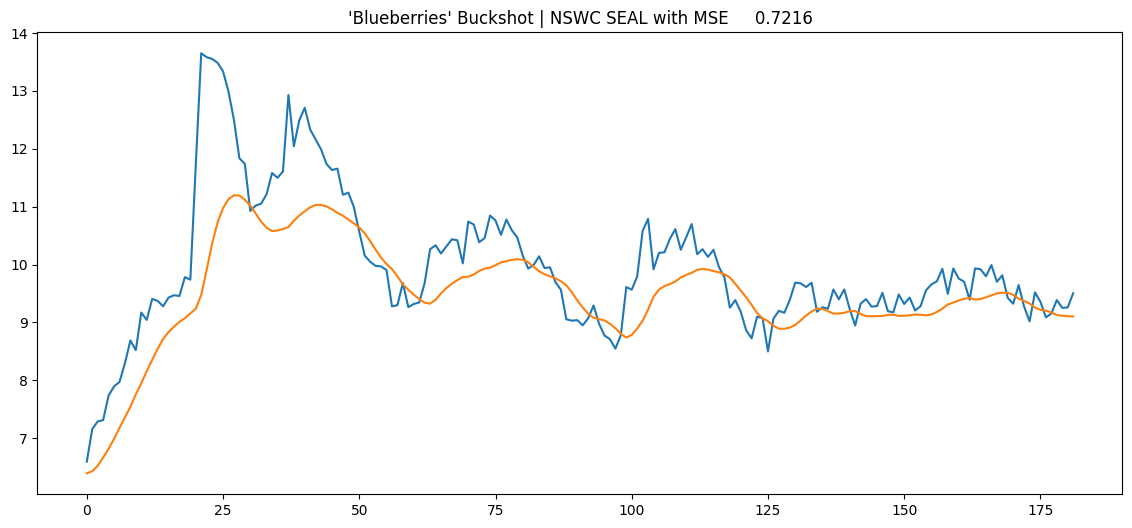

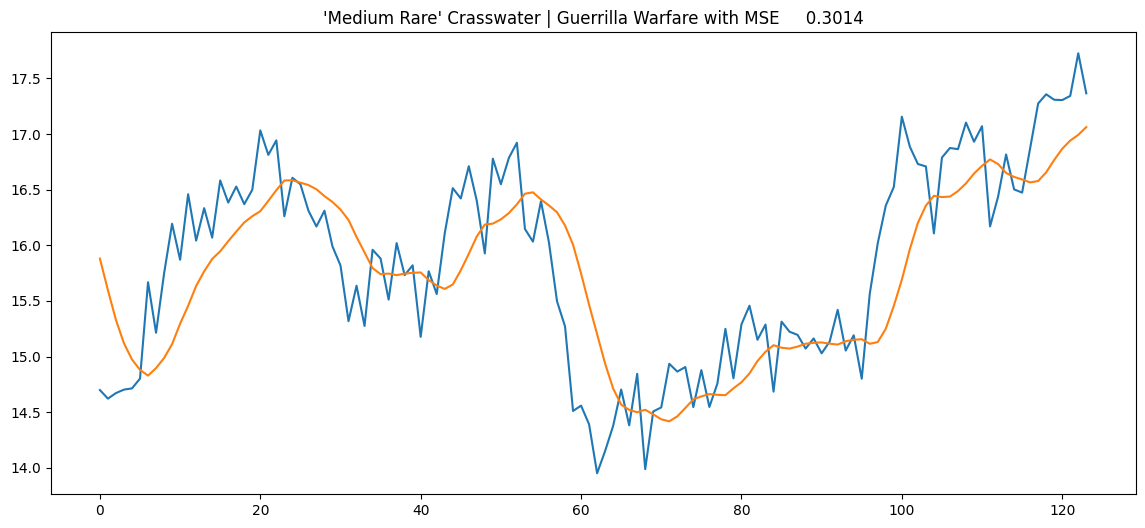

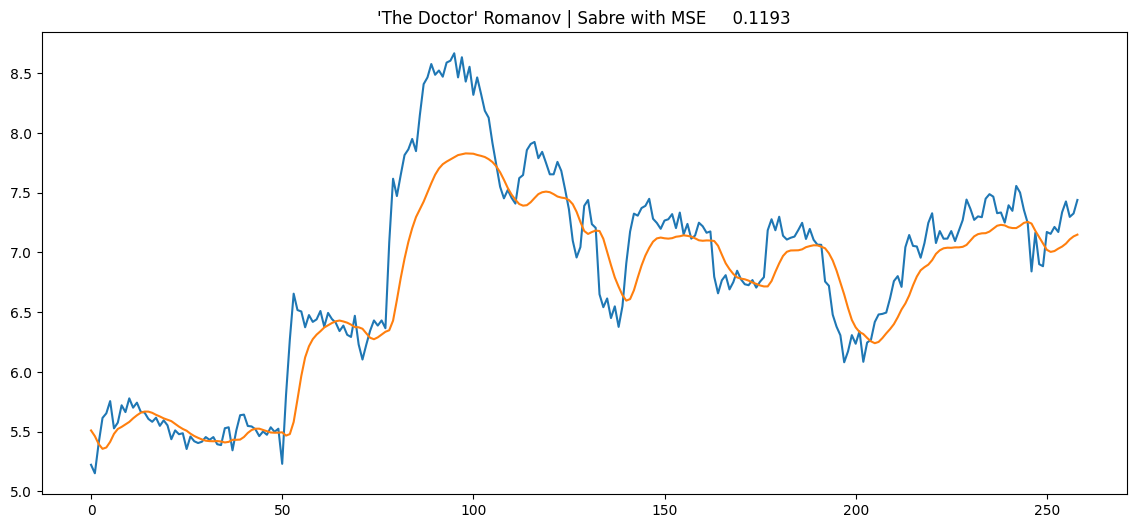

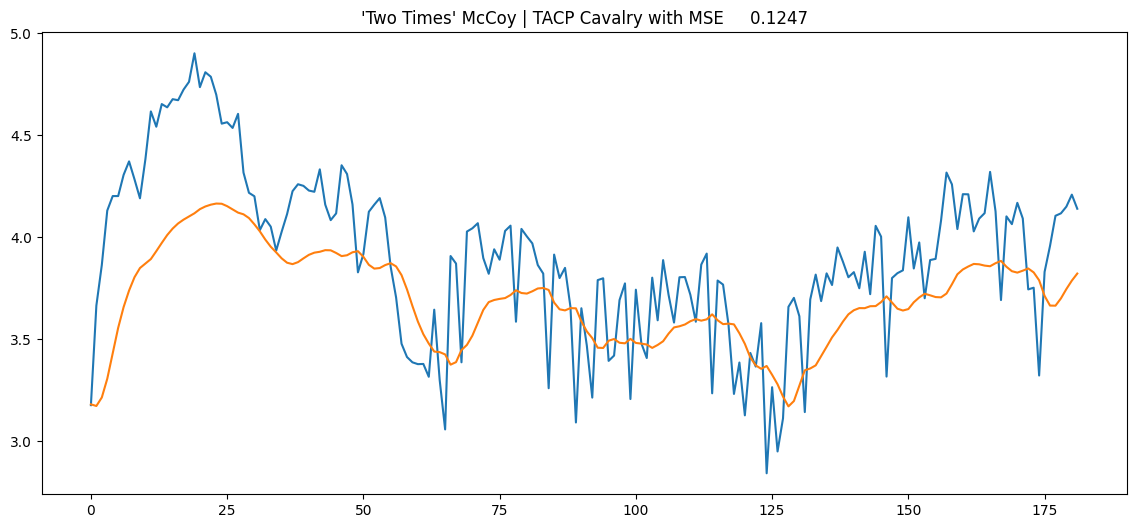

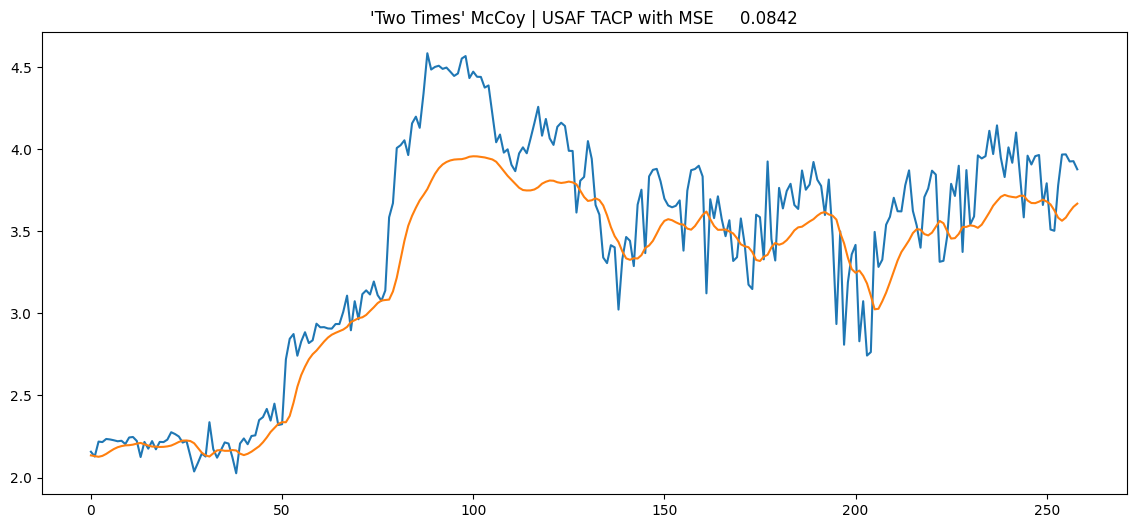

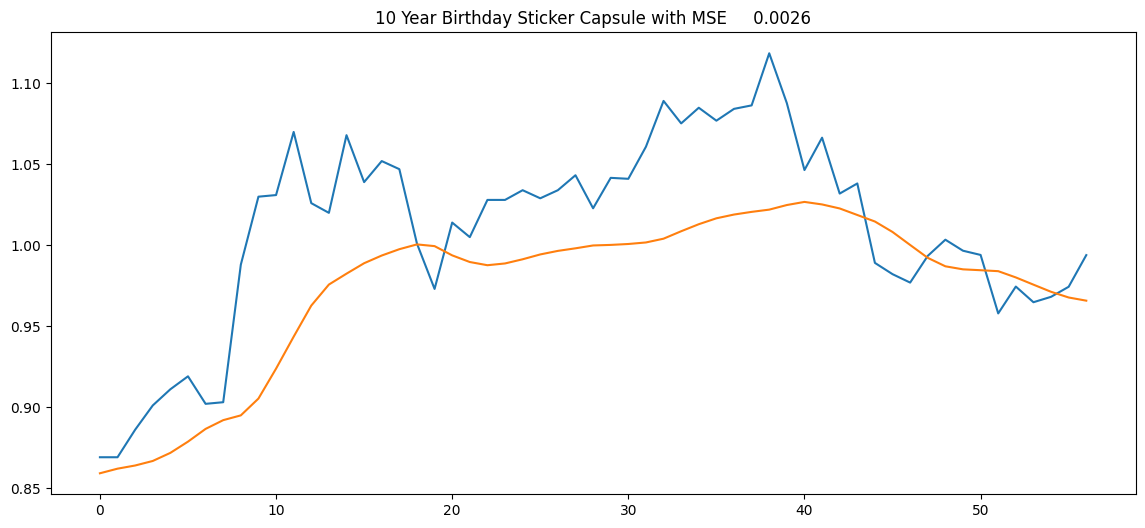

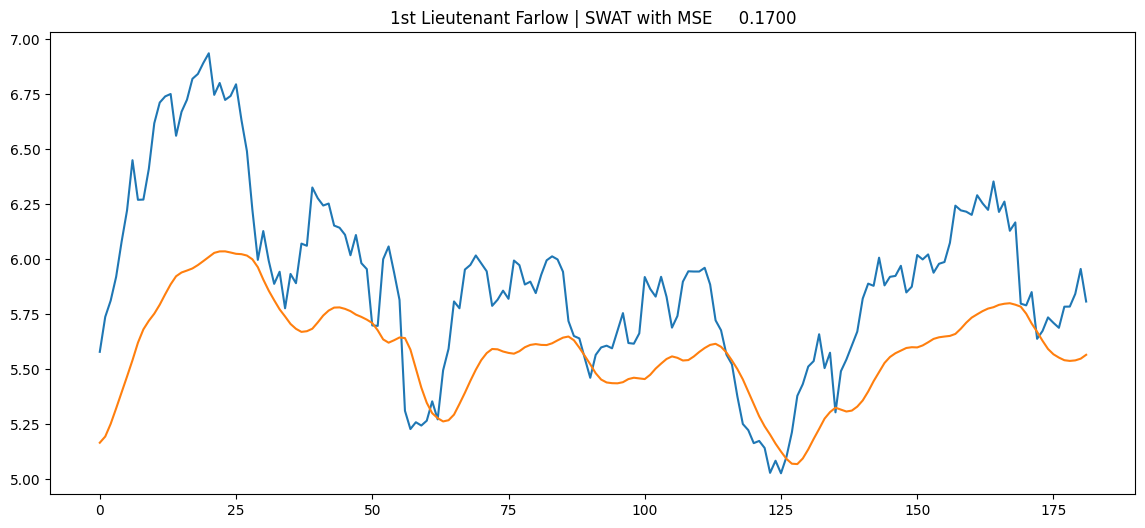

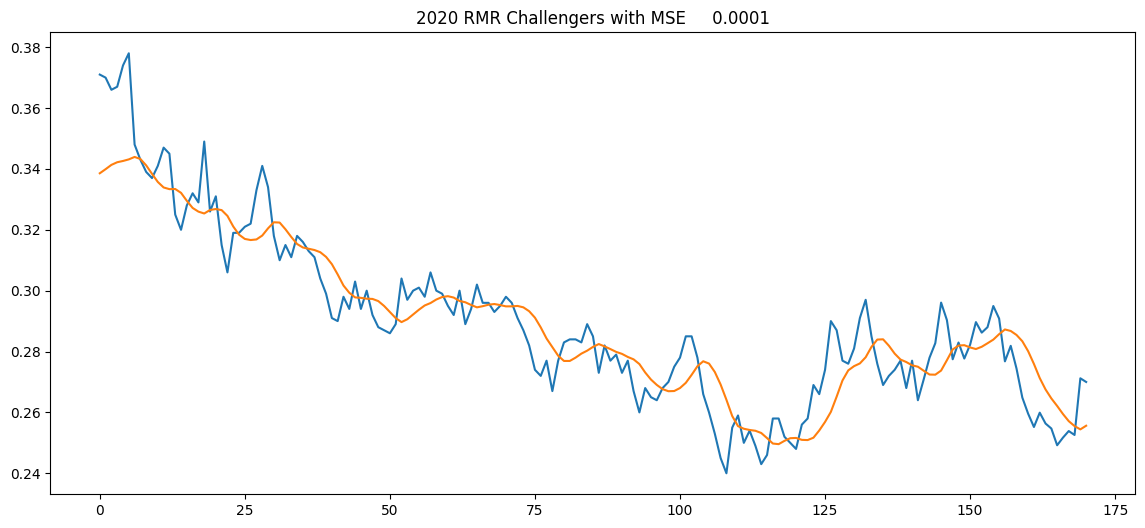

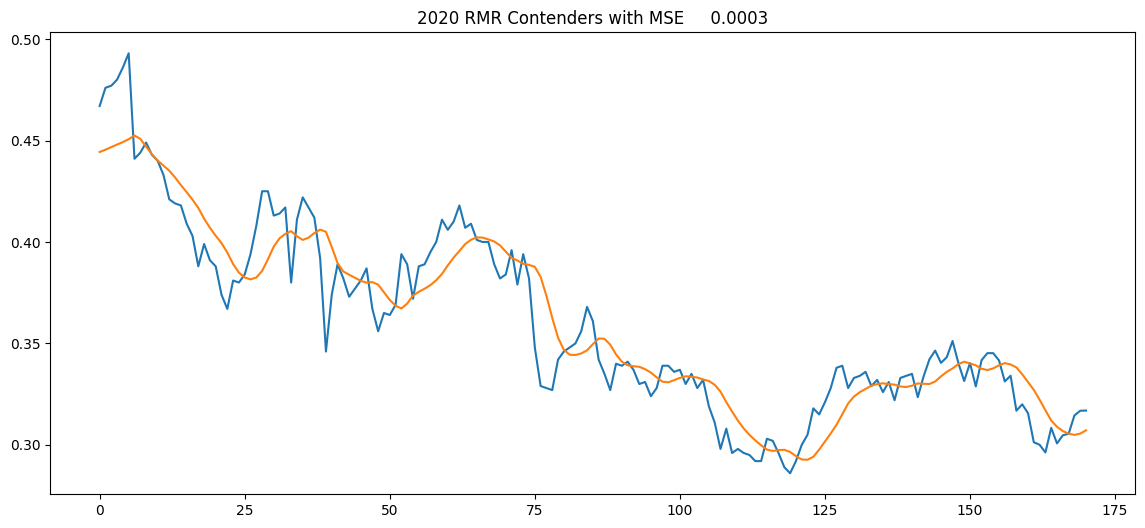

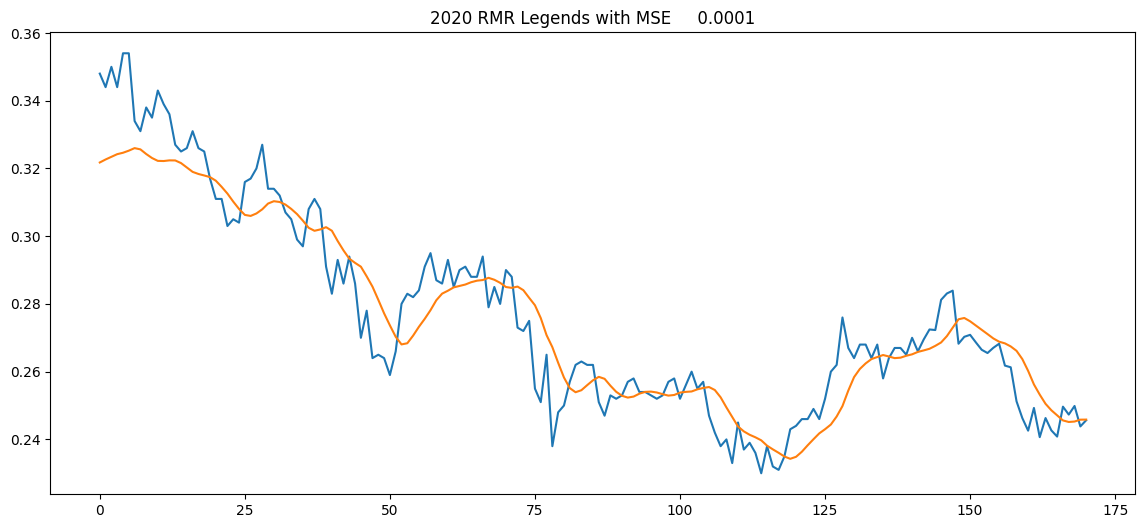

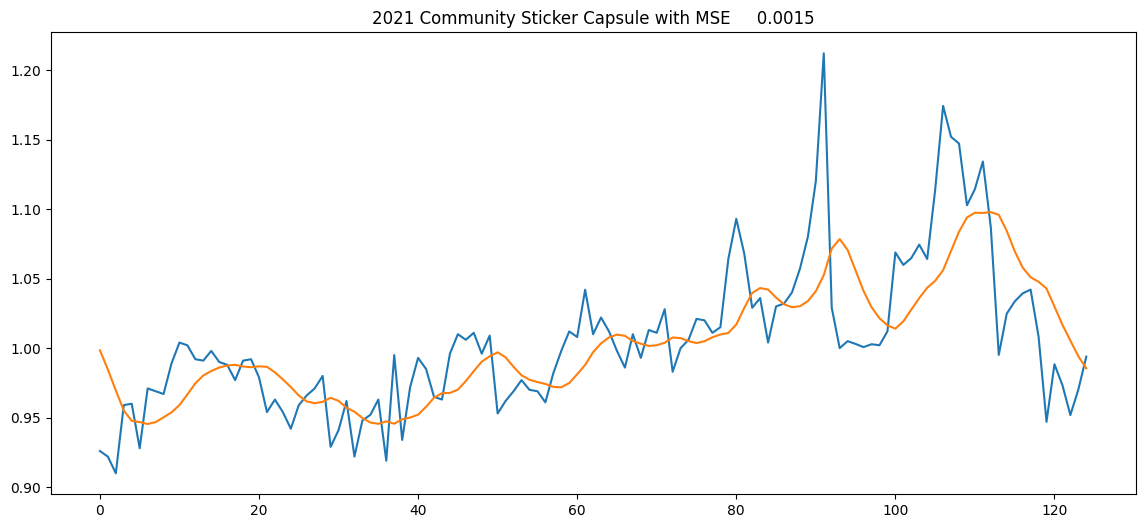

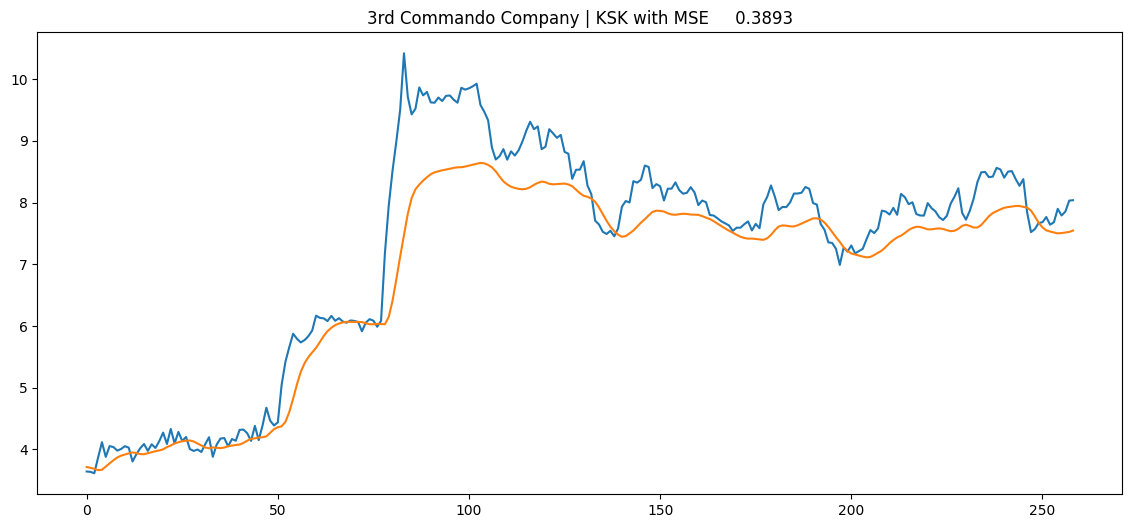

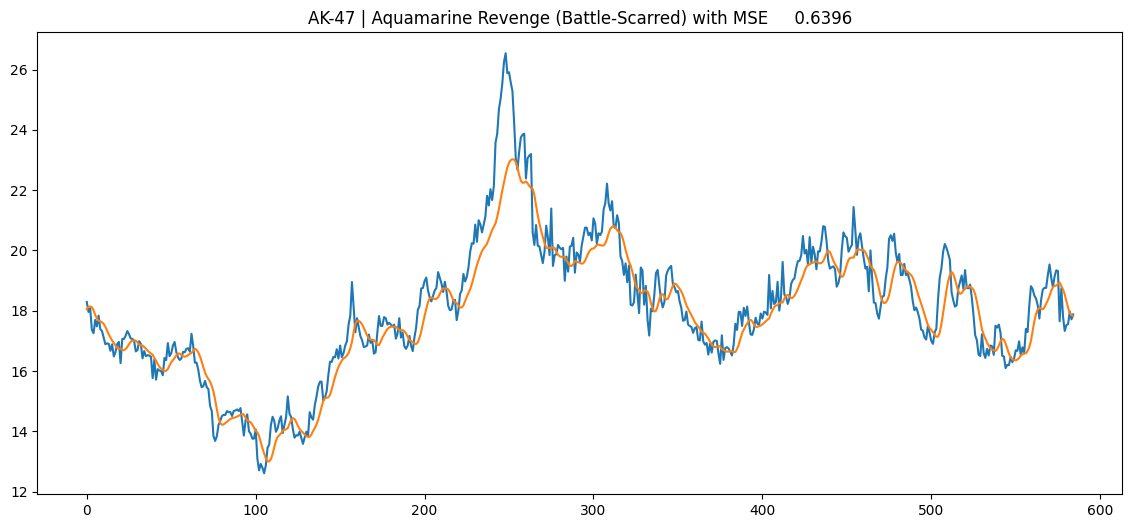

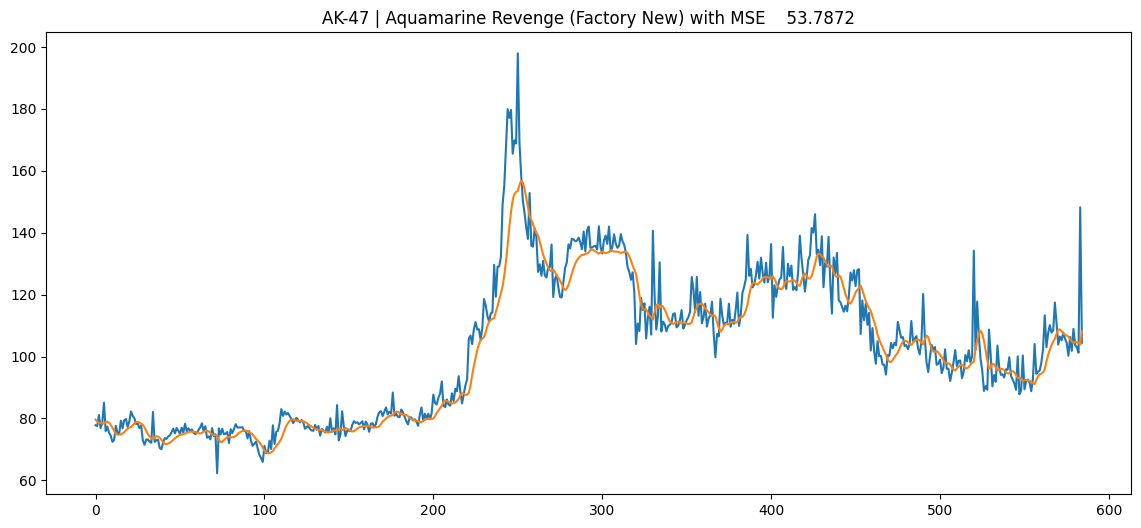

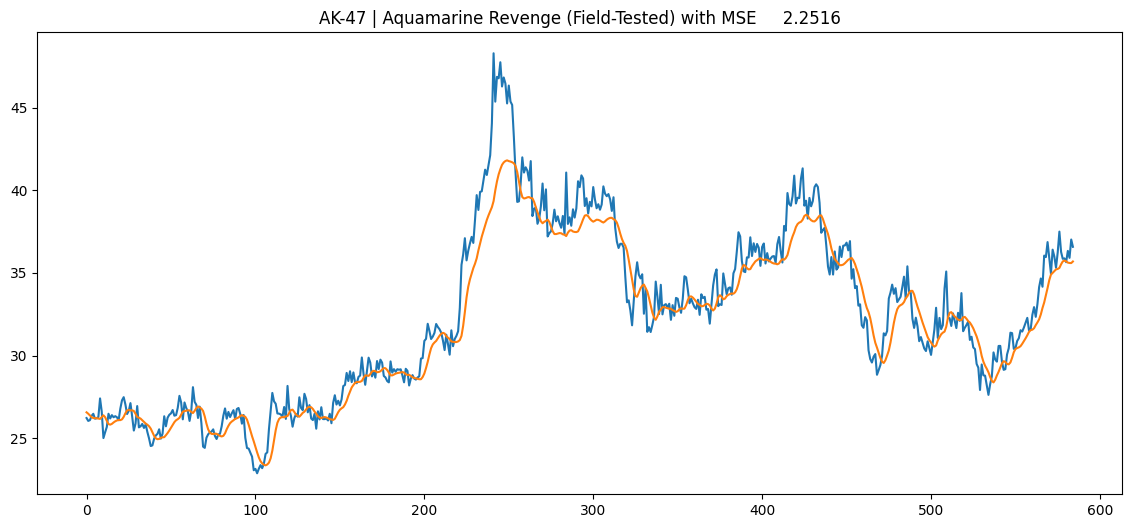

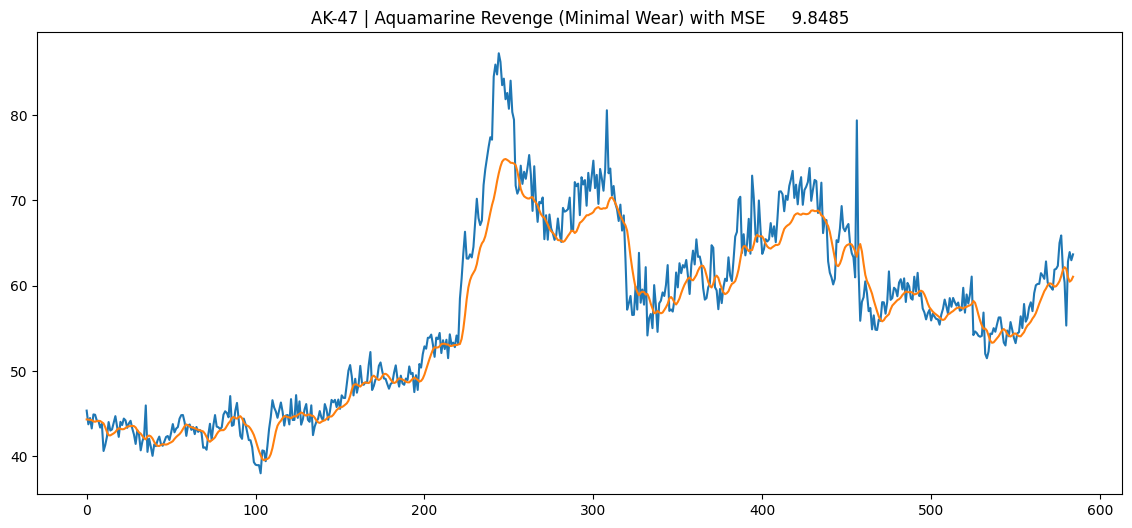

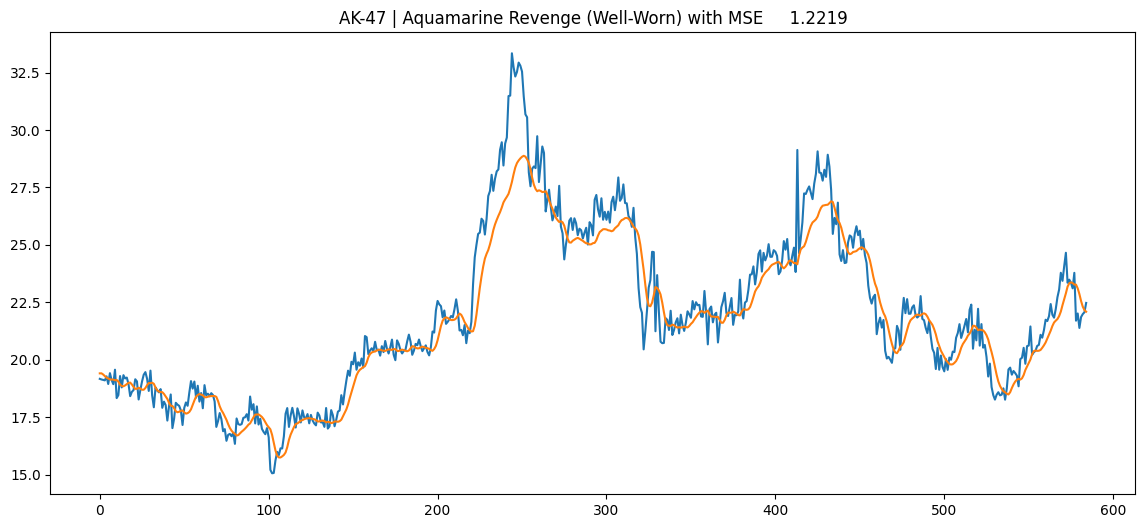

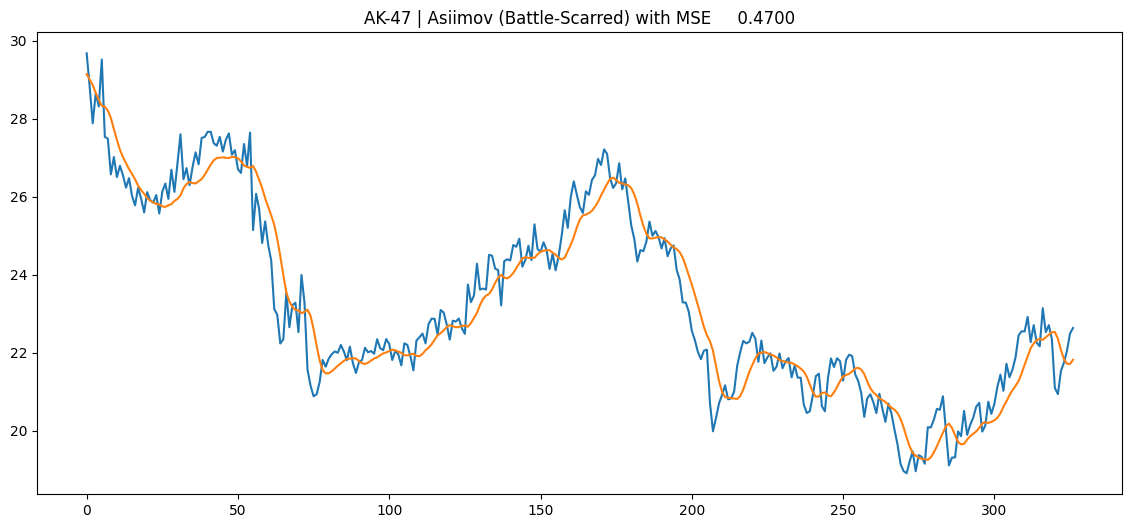

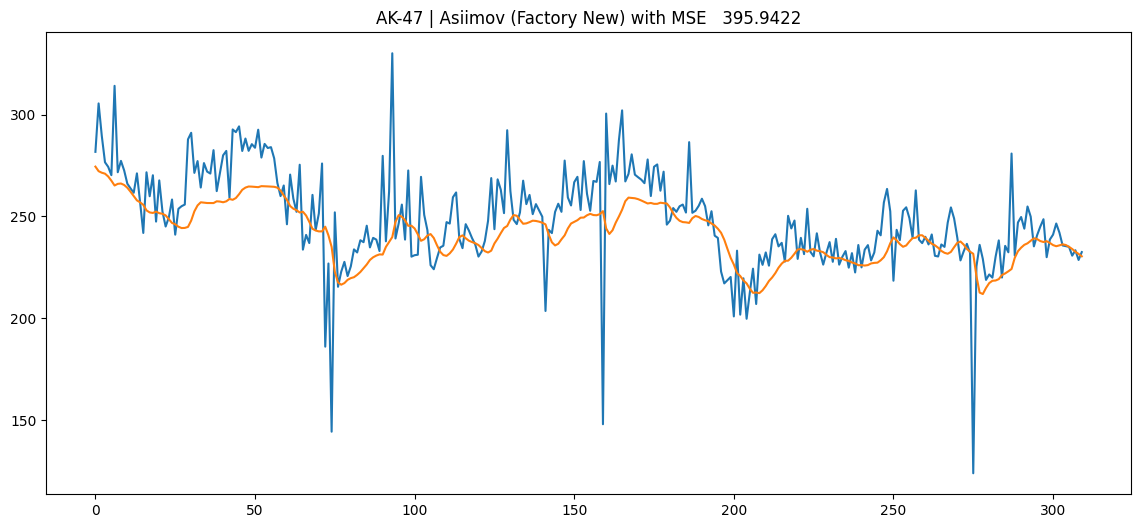

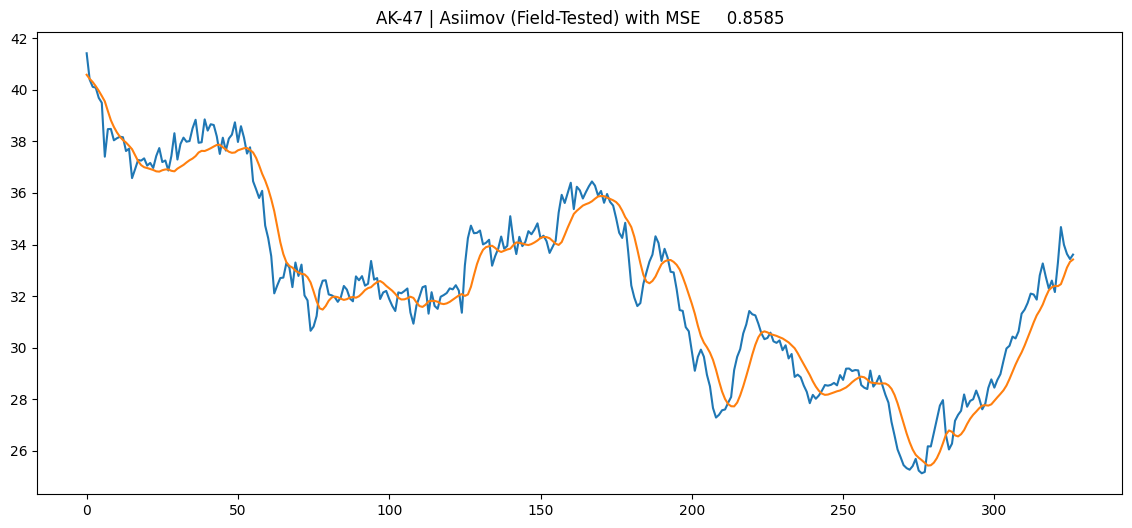

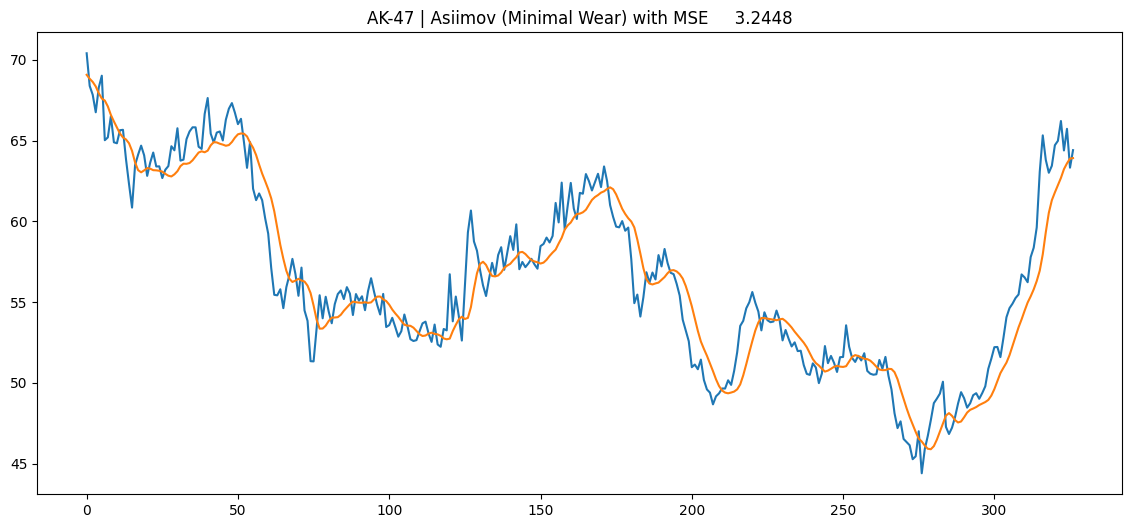

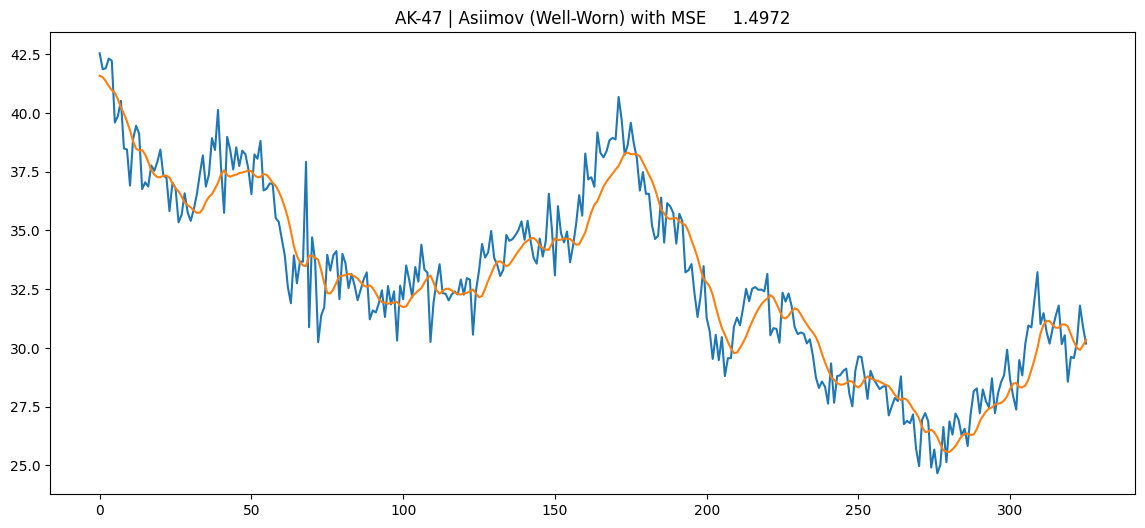

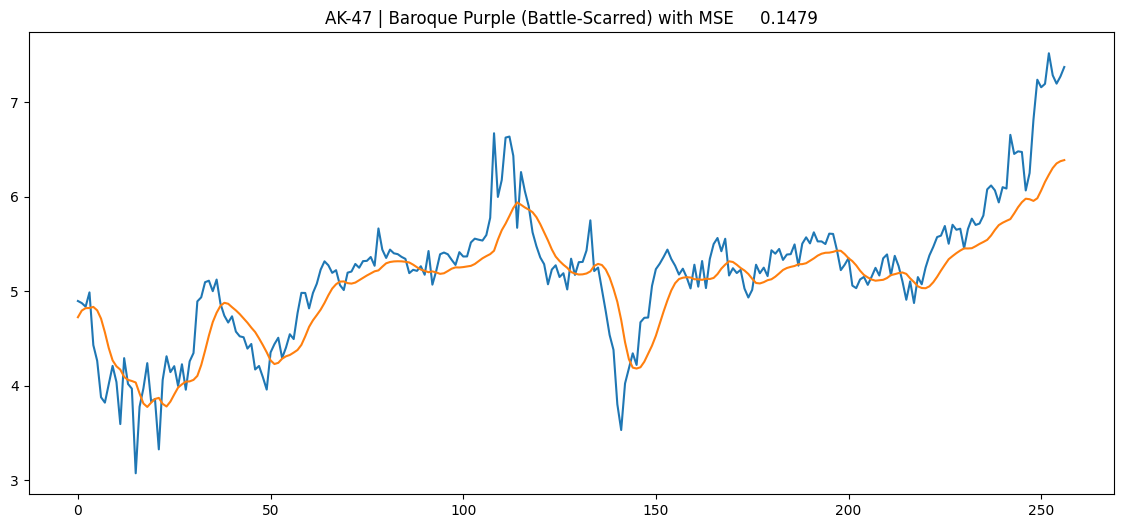

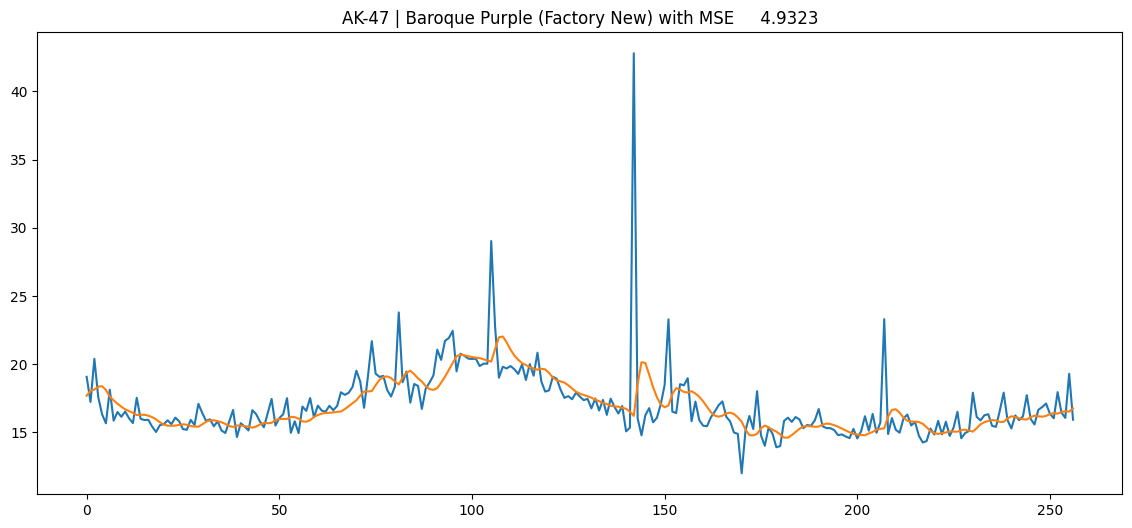

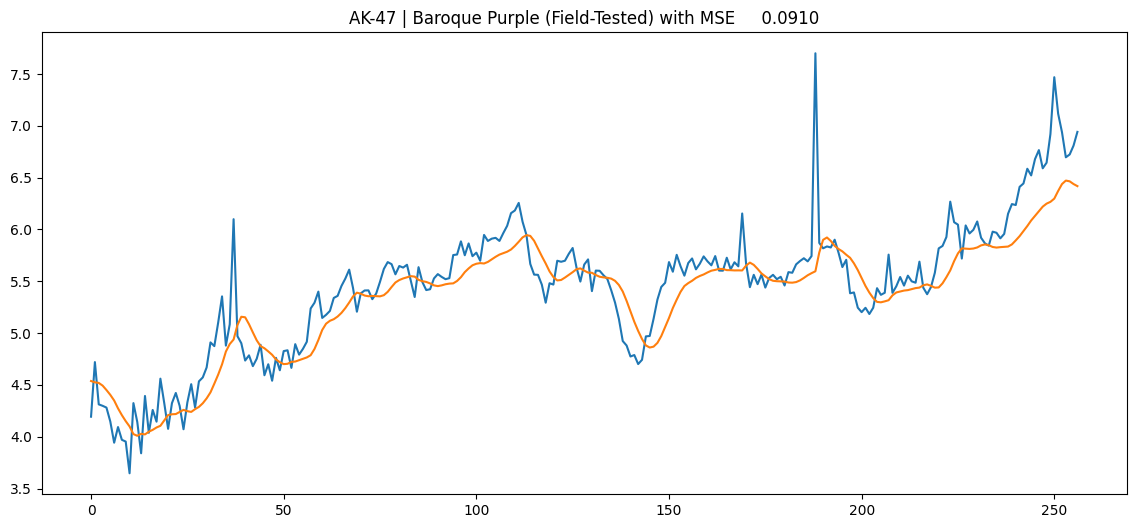

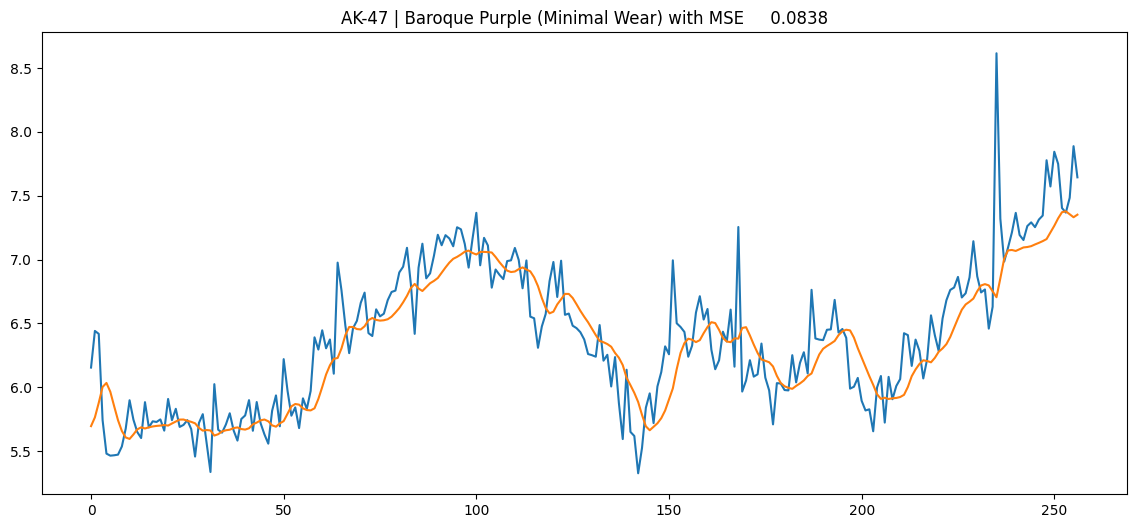

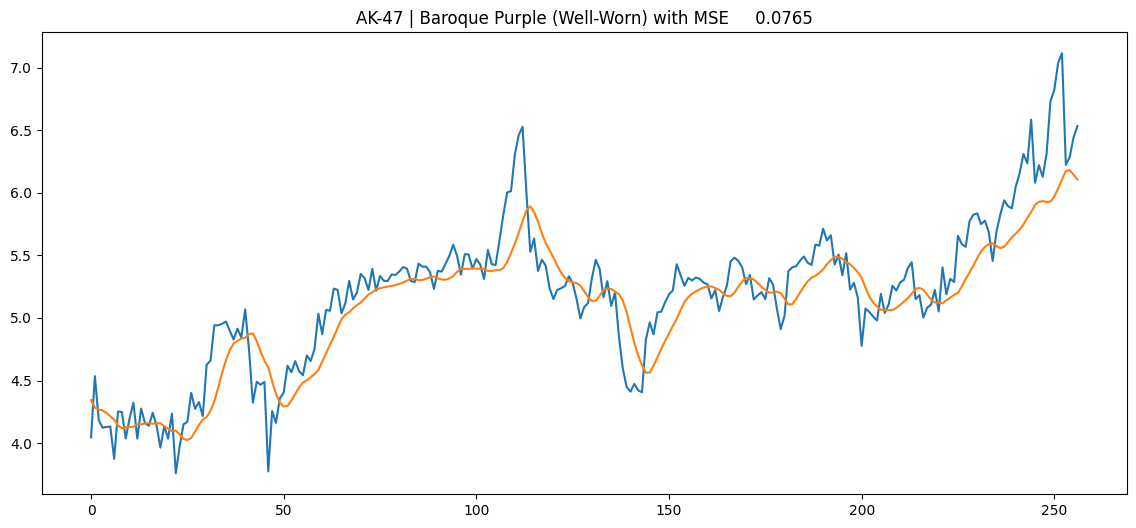

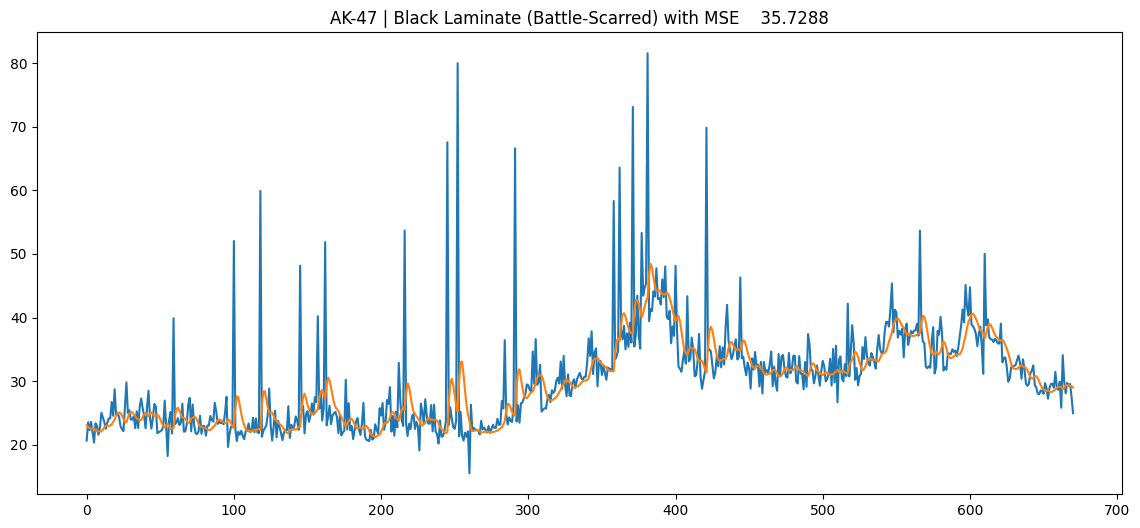

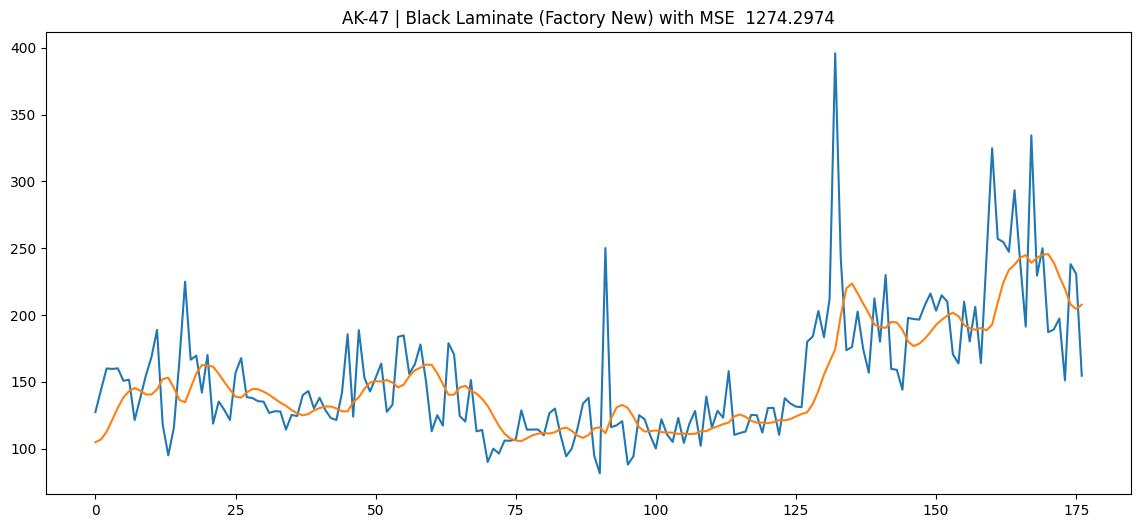

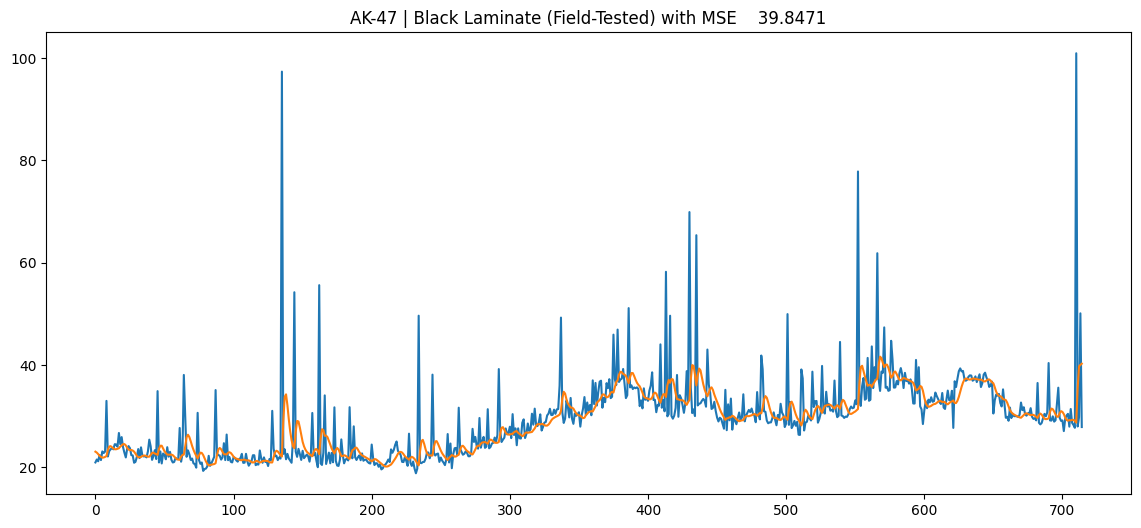

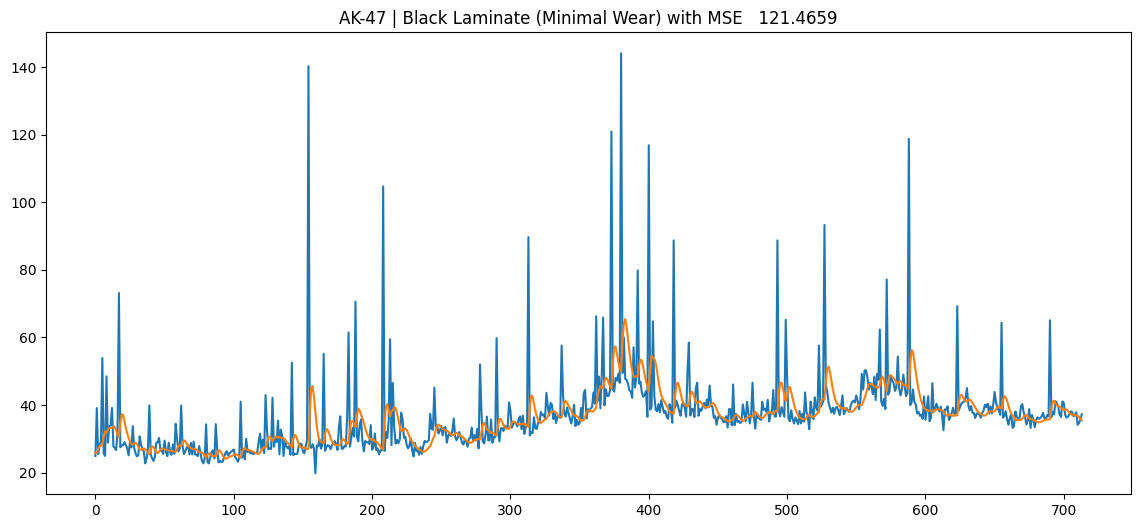

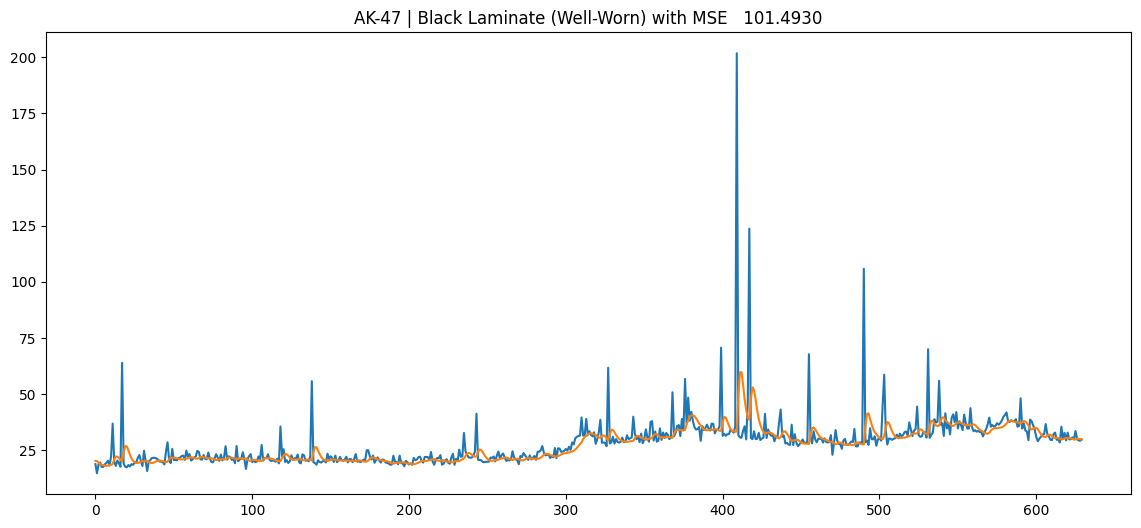

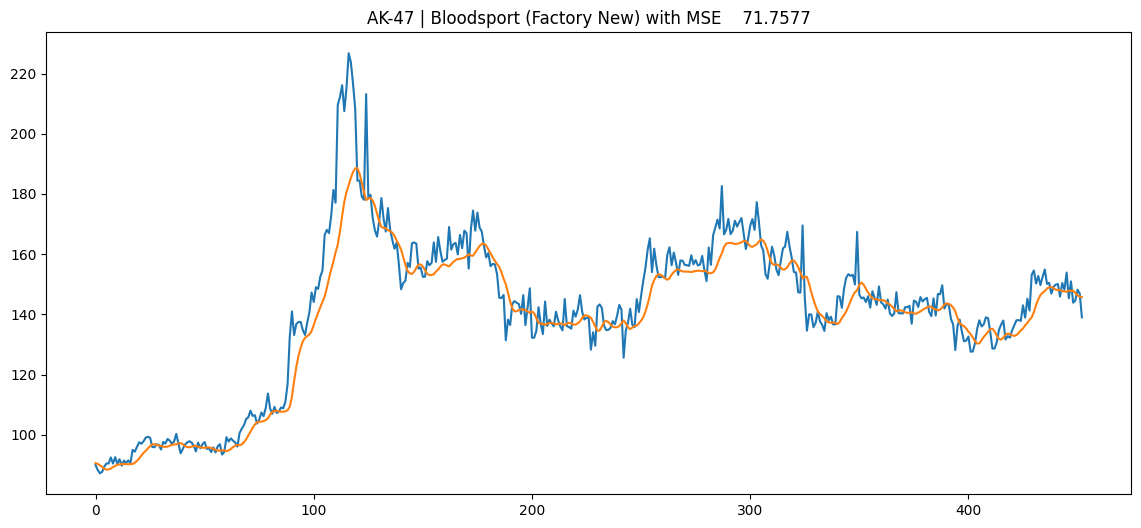

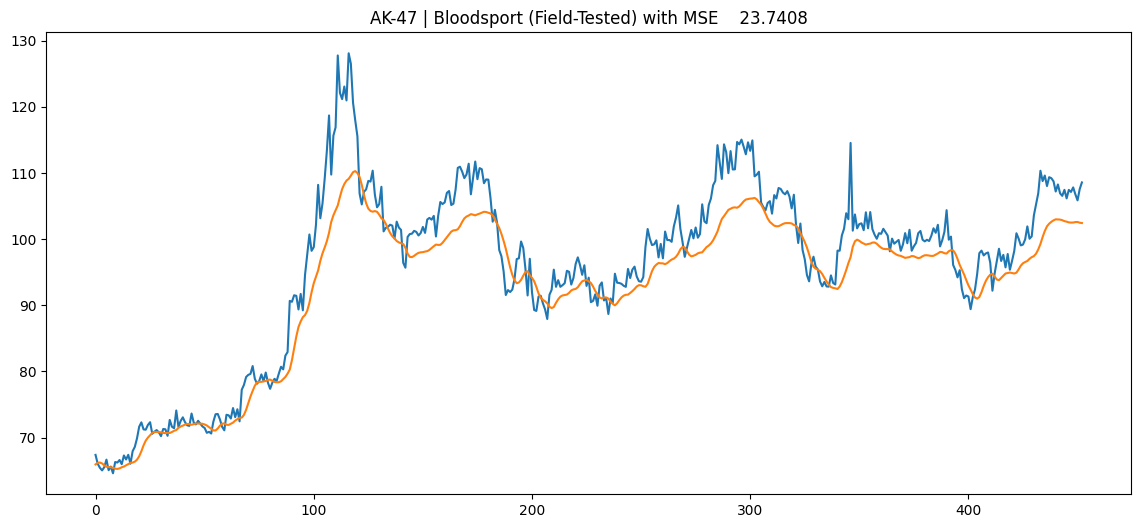

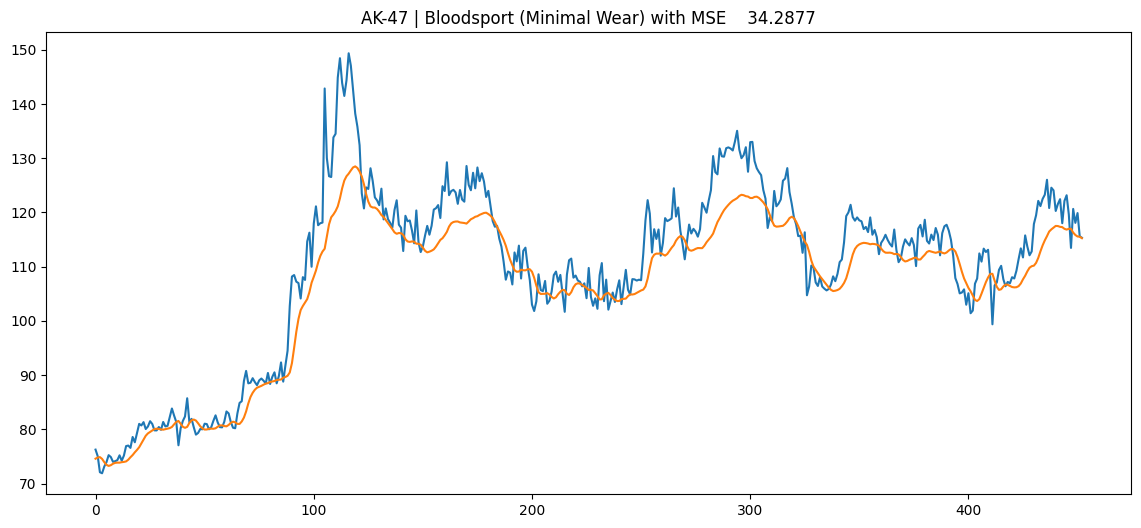

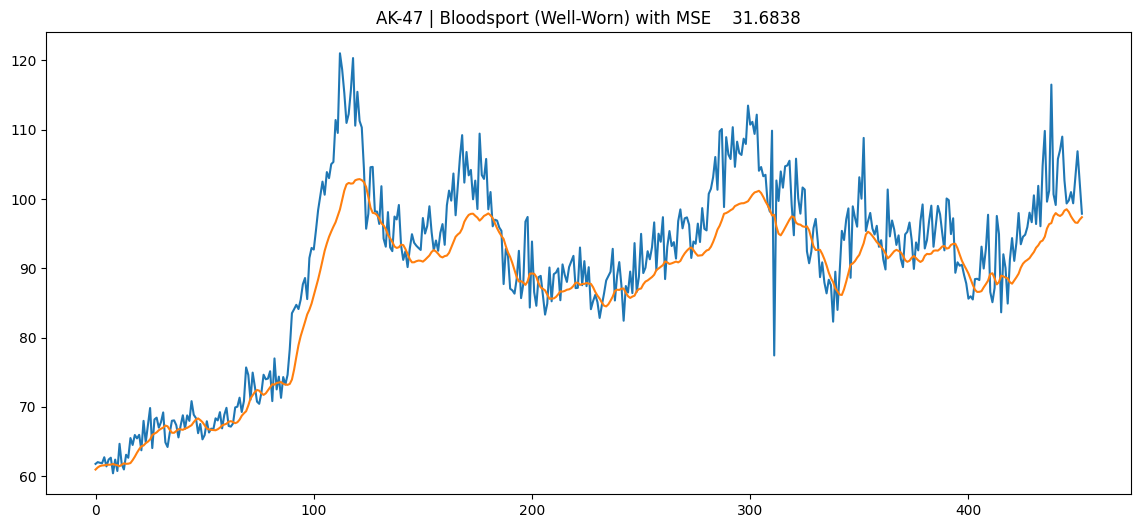

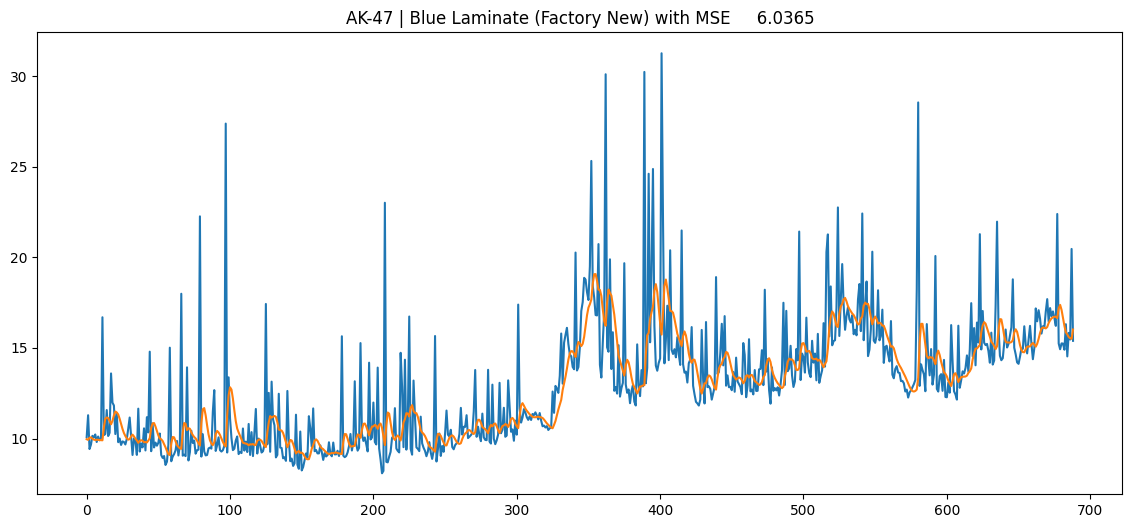

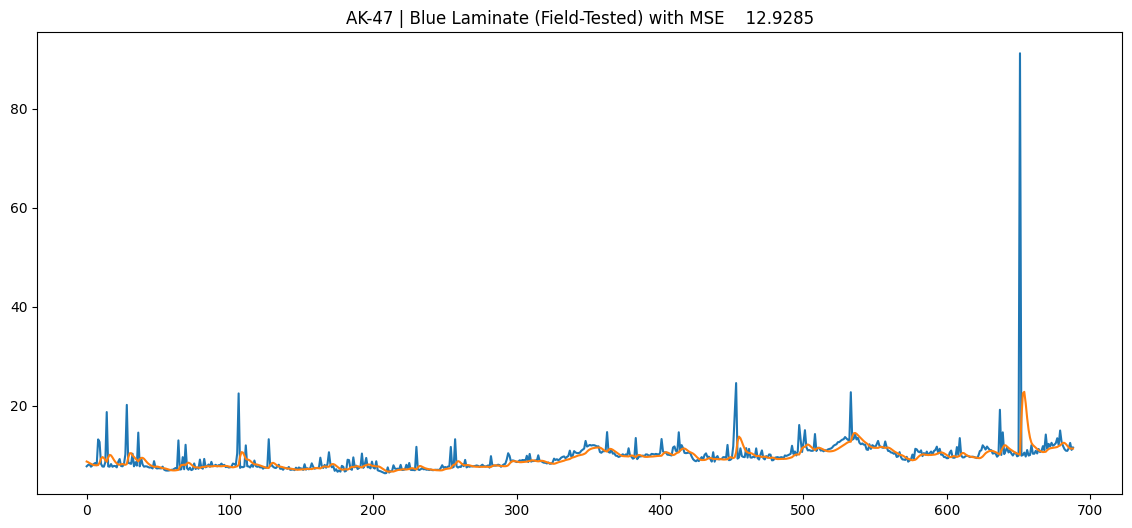

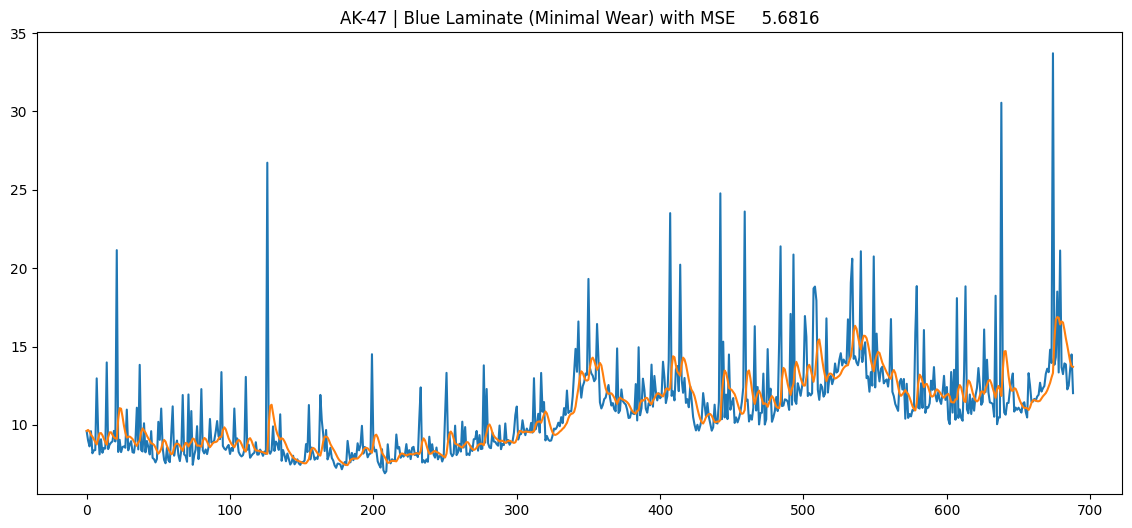

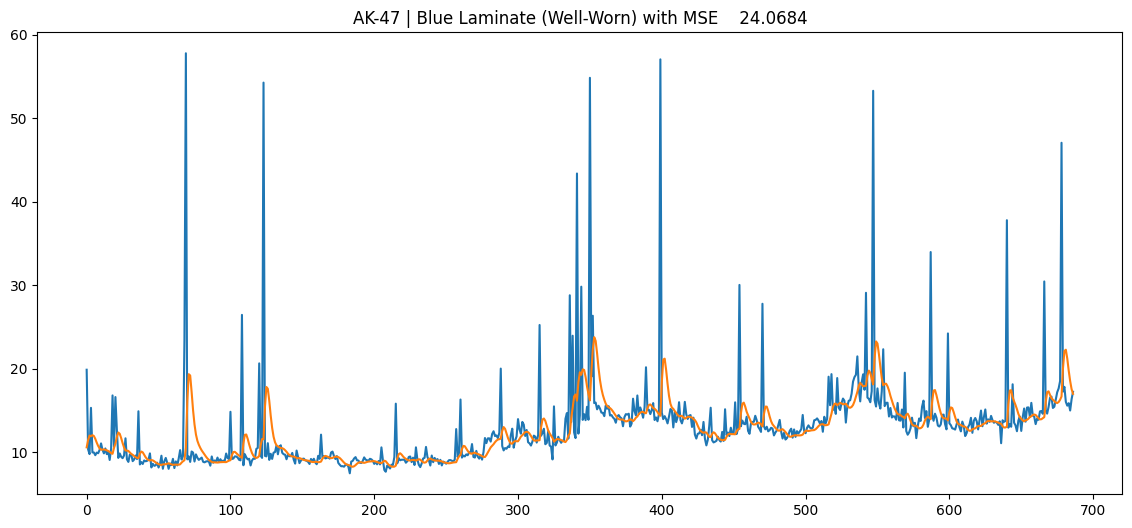

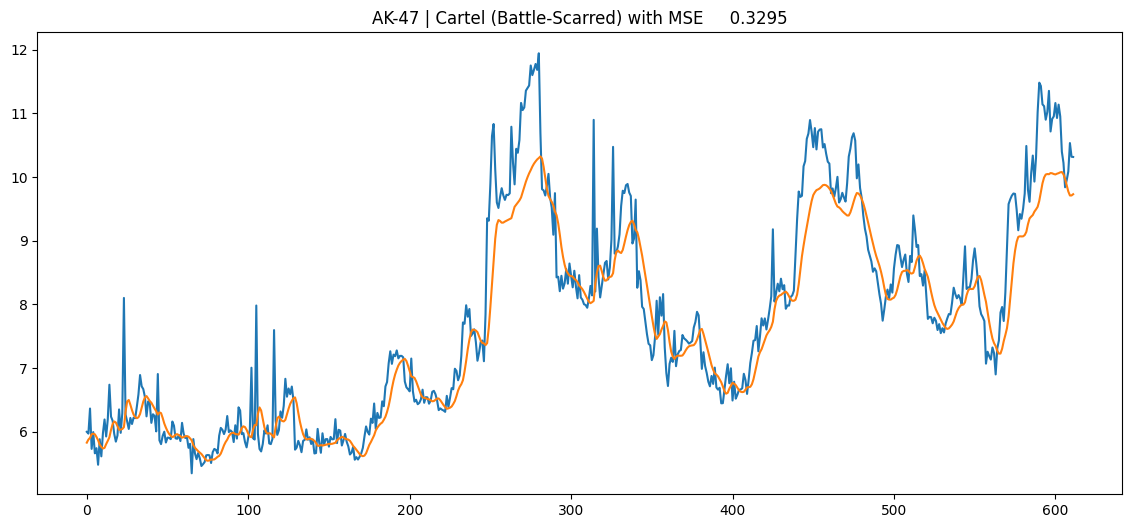

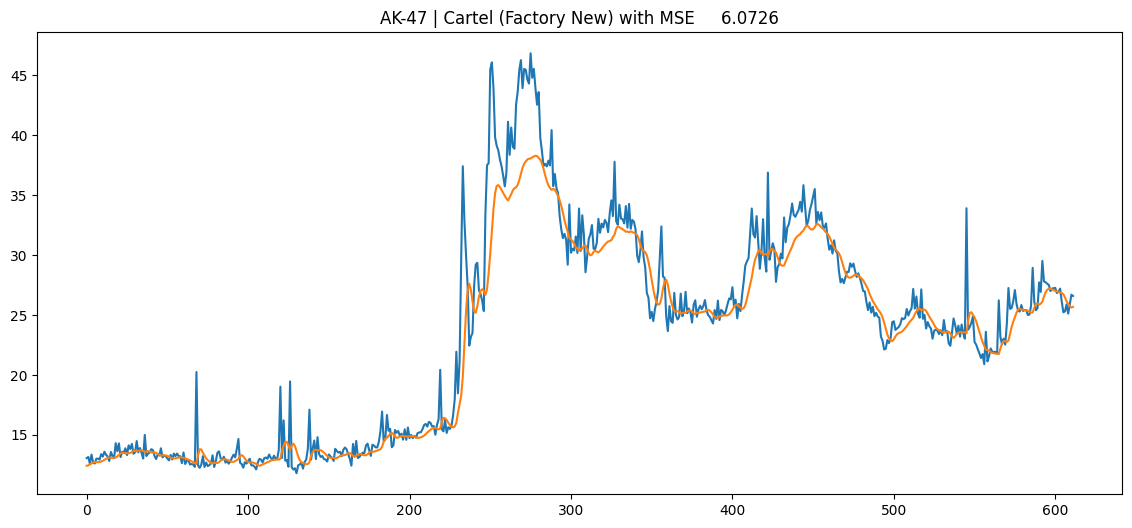

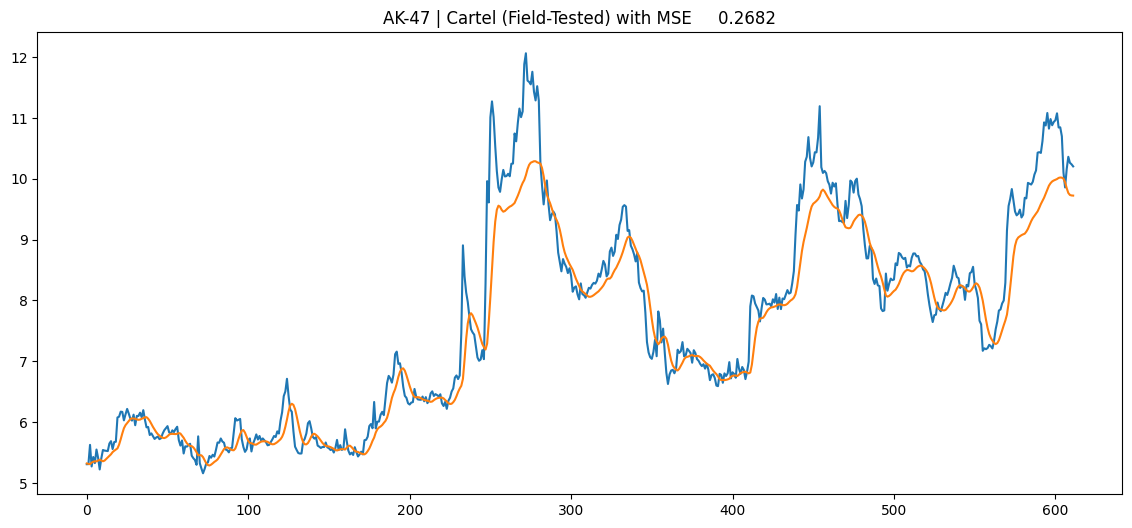

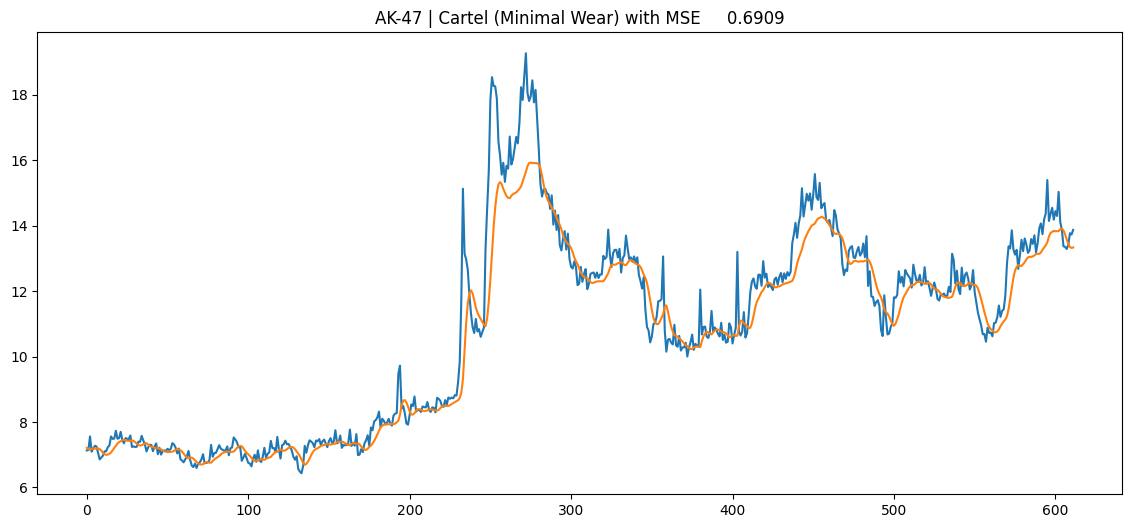

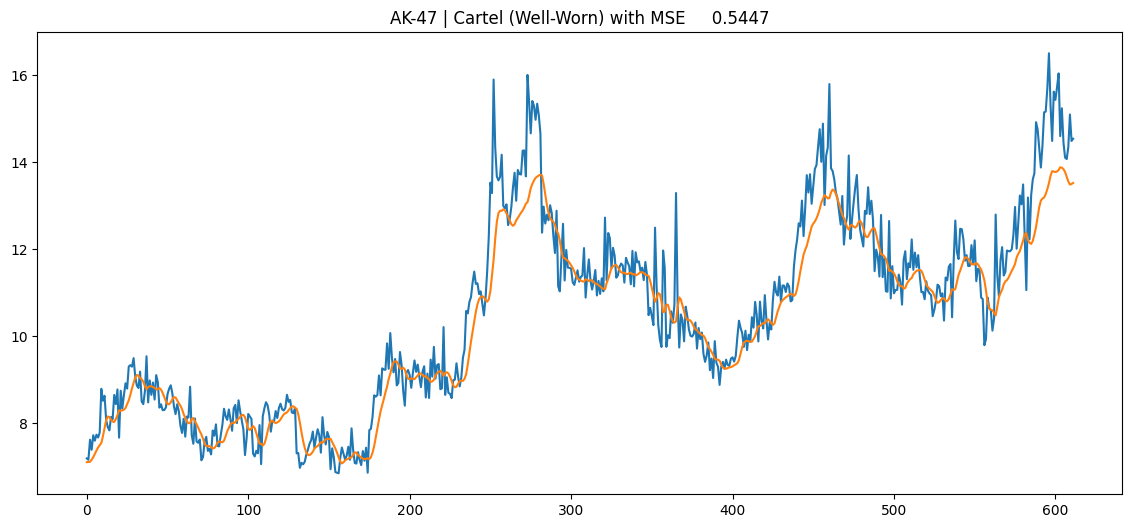

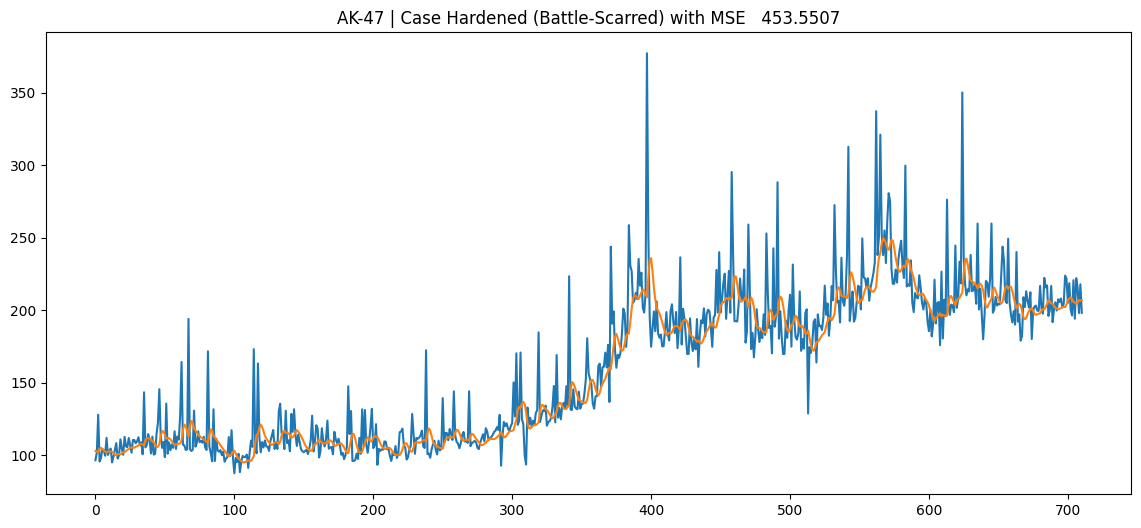

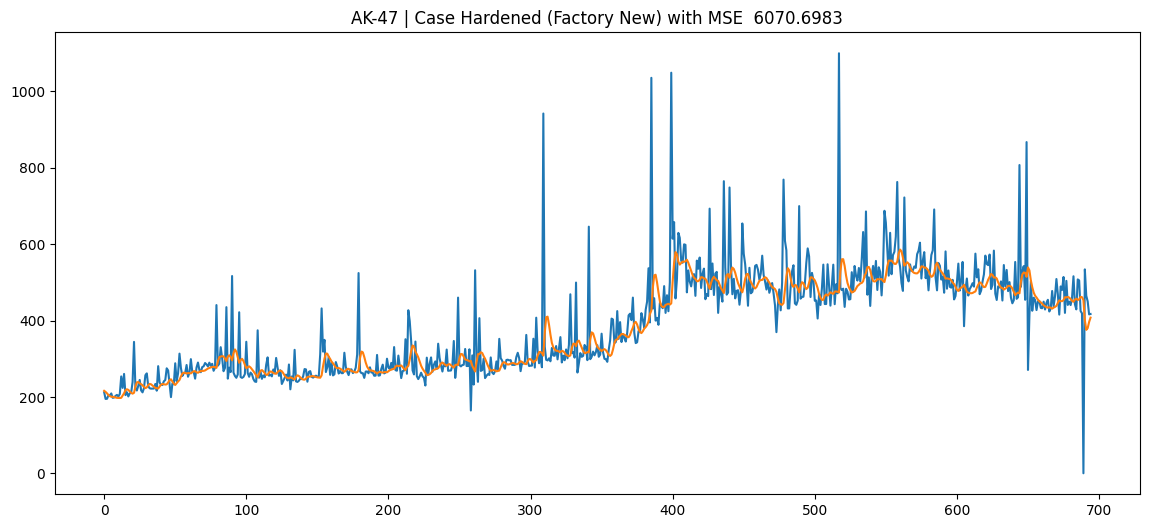

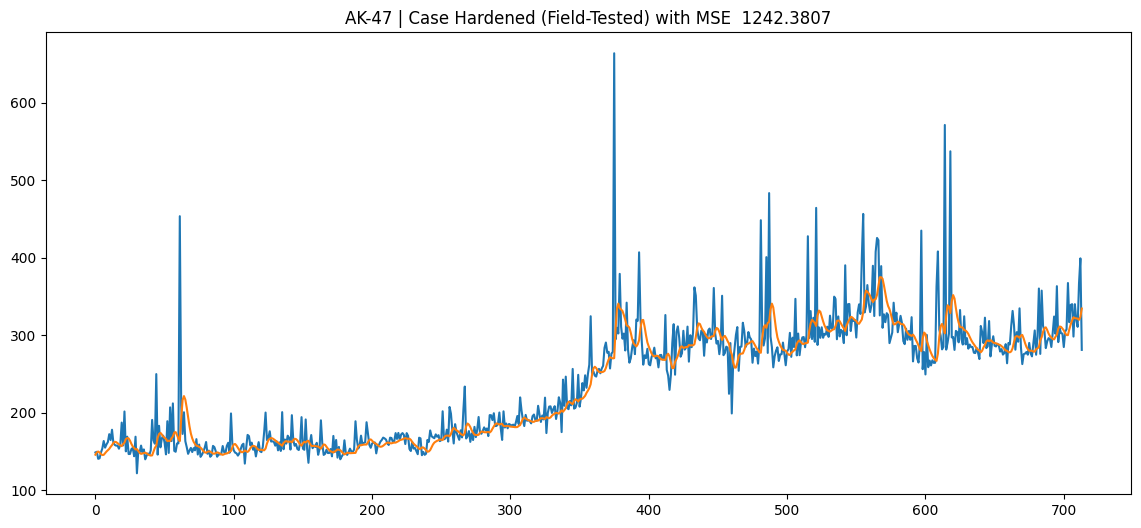

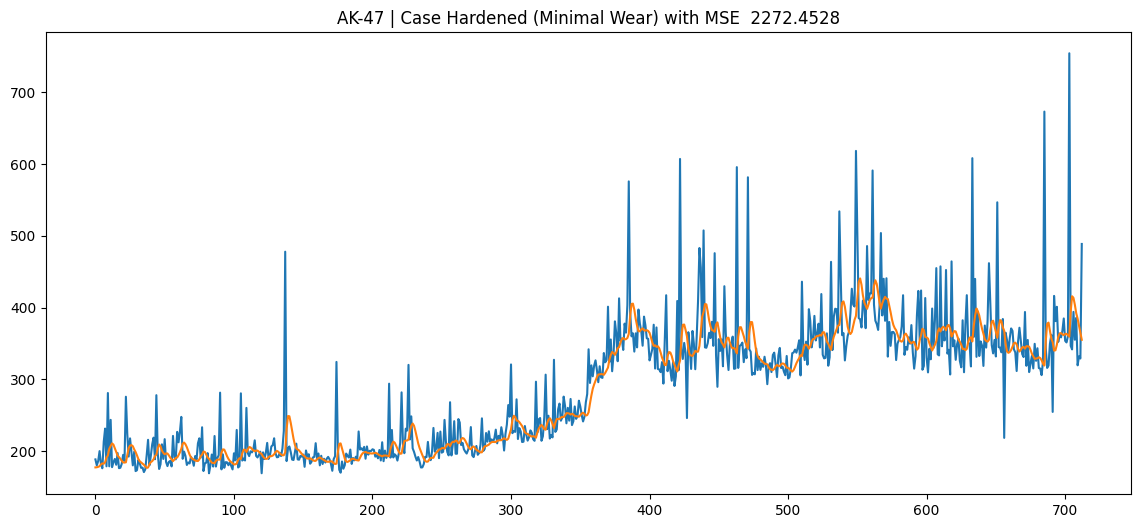

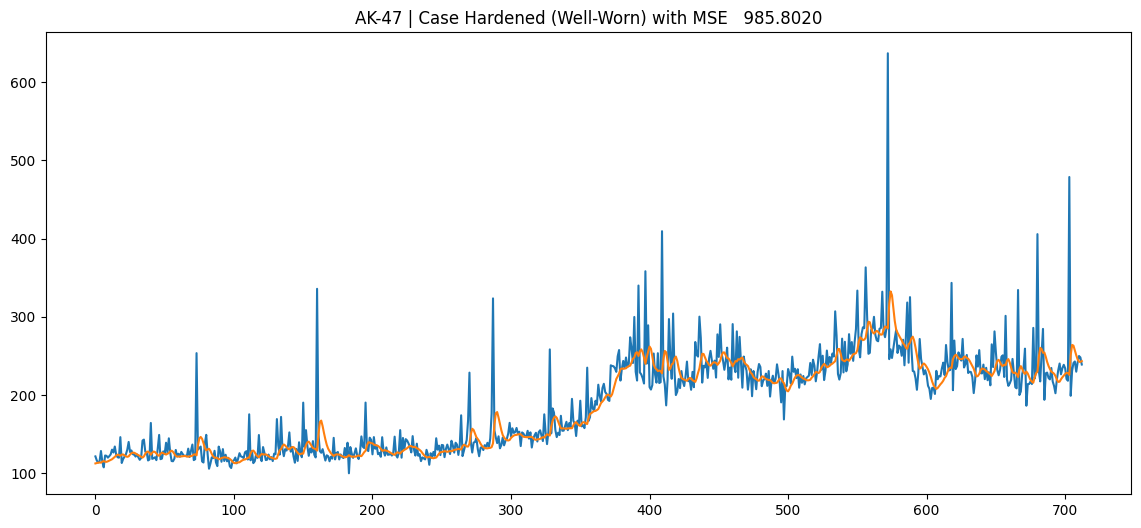

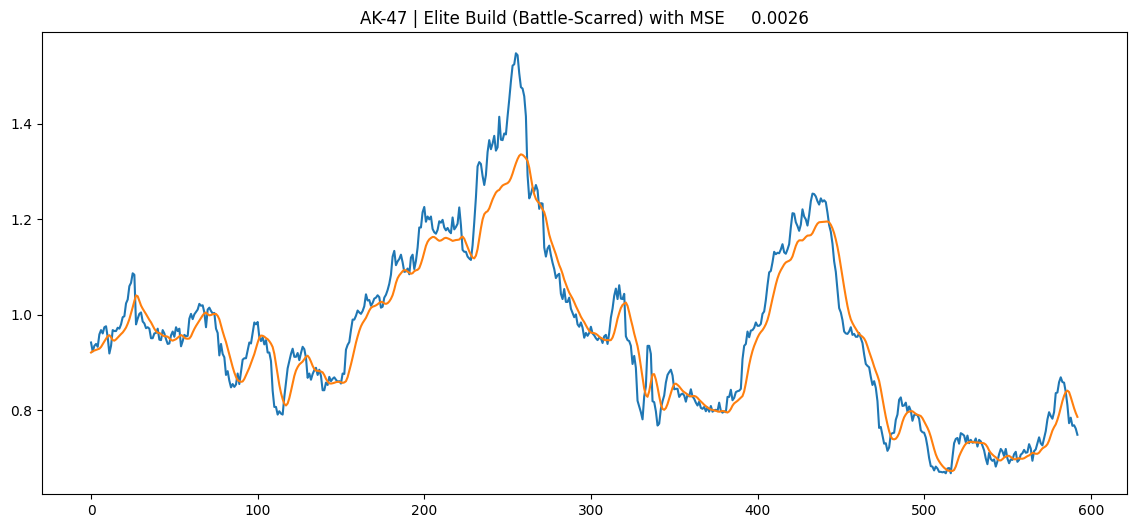

In [16]:
pred_result = {}
for i in names:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

In [17]:
regressor.save("model_50.keras")